# Assignment #3 
## House Prices: Advanced Regression Techniques

* <b> KAGGLE IDENTIFIER </b> : peyo95pd

* <b> LB POSITION </b>: 730 - 25/03/2019 23.00.00


*******
My entire work follows the indication of this book:
https://www.ke.tu-darmstadt.de/lehre/arbeiten/studien/2015/Dong_Ying.pdf

Many things need to be improved!
In conclusion the lessons learned.

###### LIBRARIES

In [1]:
# Data manipulation
import pandas as pd 
import pandas_profiling
import numpy as np 
import missingno as msno

# Plotting 
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
plt.style.use("ggplot")
import seaborn as sns 
from IPython.display import display, Image

# Statistics
from scipy import stats
from scipy.stats import norm,skew

# Models
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, Lasso, Ridge,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.ensemble import RandomForestRegressor

from mlxtend.regressor import StackingCVRegressor

from xgboost import XGBRegressor

###############################
#### FOR FURTHER ANALYSIS  ####
###############################

#from functools import reduce
#from sklearn.feature_selection import RFECV
#from sklearn.base import clone
#from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
#from sklearn.metrics import mean_squared_error, make_scorer
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
#from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, \
#RandomForestRegressor, VotingClassifier
#from xgboost import XGBRegressor
#import xgboost as xgb
#from sklearn.model_selection import GridSearchCV

##################################################

# Warning
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
%matplotlib inline


*******
* In order to have a clear understanding of the whole project i will take as reference the document provided by authour of the dataset: https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
*******

##### Import and first look on  dataset

In [2]:
# Get Data in Dataframe 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# First look 
print("The shape of  train dataset is",train.shape)
print("The shape of test dataset is",test.shape)

display(train.head(4))
display(test.head(4))

The shape of  train dataset is (1460, 81)
The shape of test dataset is (1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  

[4 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  

[4 rows x 80 columns]

* It is necessary to look the data types present in the dataset

In [4]:
print(train.info())
print("**"*30)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

From the basic inspection we can figure out the pitfalls of the dataset:
 
* many categorical variables (43 object)
* many variables have missing data

*************
*************

* The competitions hosted by Kaggle are different from data mining problems in the real world. Hamner, Kaggle Co-founder & CTO [20] states that there are three main things that Kaggle has done for competition participants that professional data scientists need to do:

    1) Identify the problem and how to address it using machine learning

    2) Collect the appropriate data

    3) Clean and transform the data, and split the data into training and test datasets
    
*************
*************

* In the image below it is illustrated the pipeline used for this Kaggle competition, but it can also be extendted for   others competitions. There are 6 steps before the final prediction task and the process of this pipeline is also interactive and iterative.

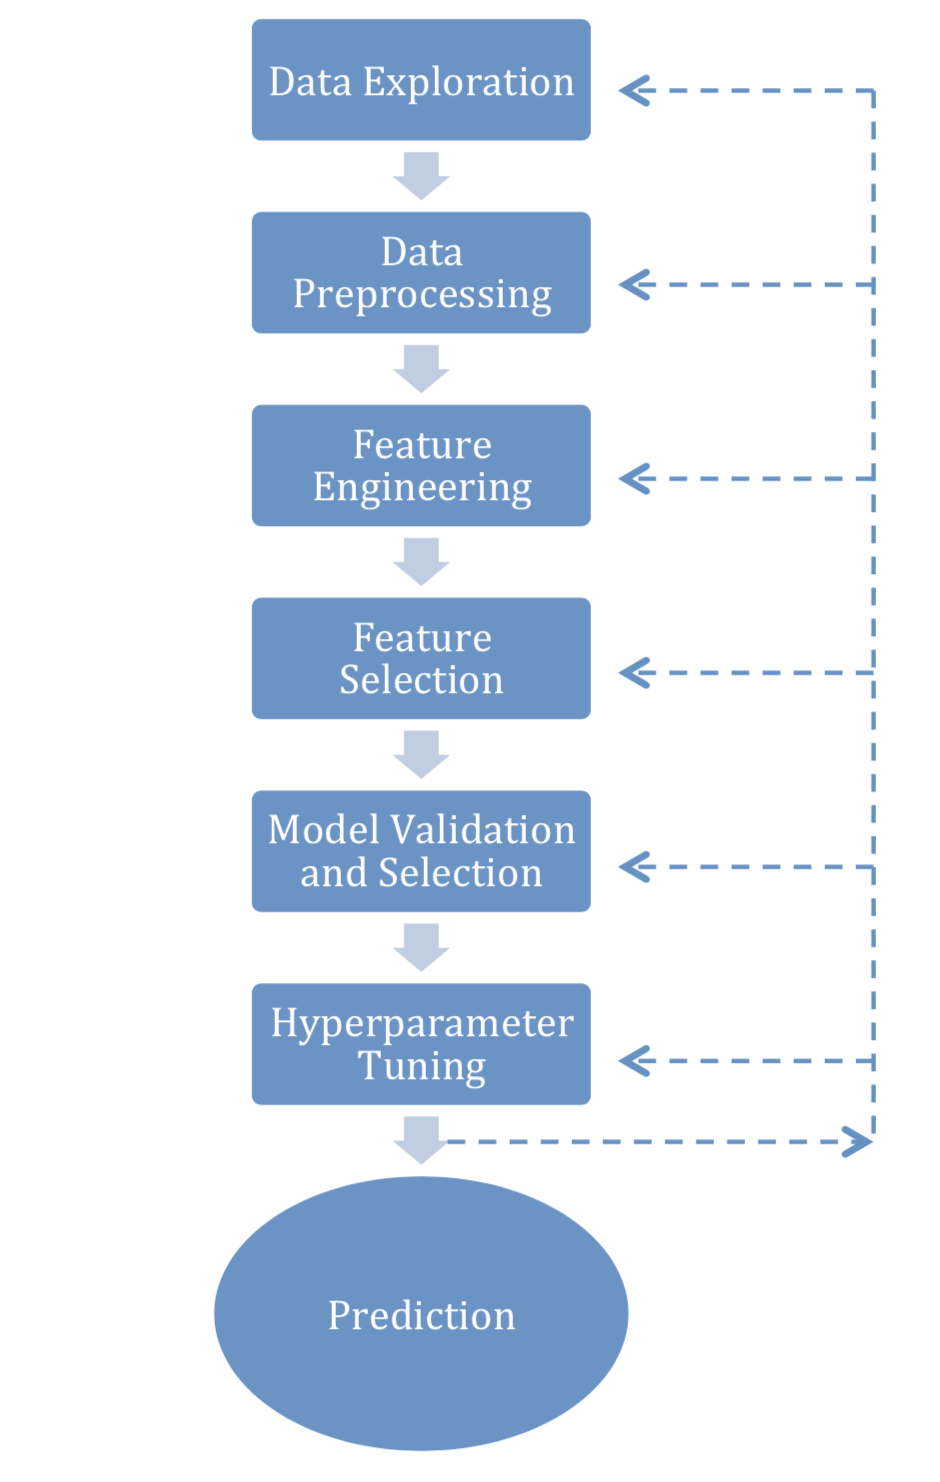

In [5]:
Image("Pipeline.png",width = 400, height = 1,unconfined= True)

### 1 DATA EXPLORATION

###### TARGET VARIABLE

* Let's plot the distribution of the target variable!
  
  
 * It is always useful to check the distribution of the target variable, and indeed all  numeric variables, when building a regression model. Machine Learning algorithms work well with features that are normally distributed. If features are not normally distributed, you can transform them using statistical methods.

Text(0.5,1,'Log Sales Price distribution')

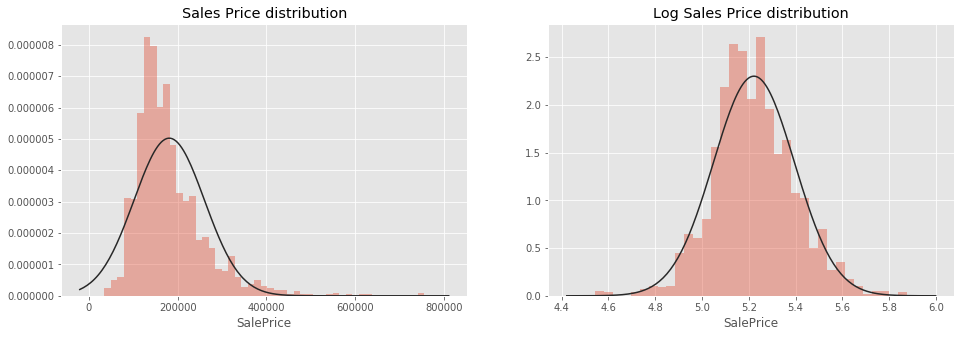

In [6]:
plt.figure( figsize = (16,5) )

plt.subplot(1,2,1)
sns.distplot(train["SalePrice"], kde =False, fit = norm)
plt.title("Sales Price distribution")

plt.subplot(1,2,2)
sns.distplot(np.log10(train["SalePrice"]), kde =False, fit = norm)
plt.title("Log Sales Price distribution")

* The distribution of the target variable is positively skewed.


  In order to transform this variable into a distribution that looks closer to the black line shown above, we can use the numpy function `log1p` which applies log(1+x) to all elements within the feature.

In [7]:
train["SalePrice"] = np.log1p(train["SalePrice"])

###### FEATURES

* First i stored the numerical and categorical features separately

In [8]:
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features   = train.select_dtypes(exclude = ["object"]).columns[1:-1] #remove Id and SalesPrice

###### Categorical

 * On the left we can visualize the $frequency$ of this variables,
   while on the right their $relationship$ $with$ $the$ $target$

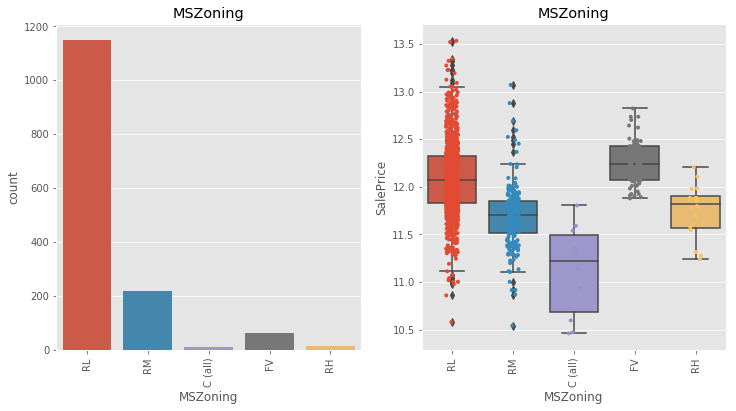

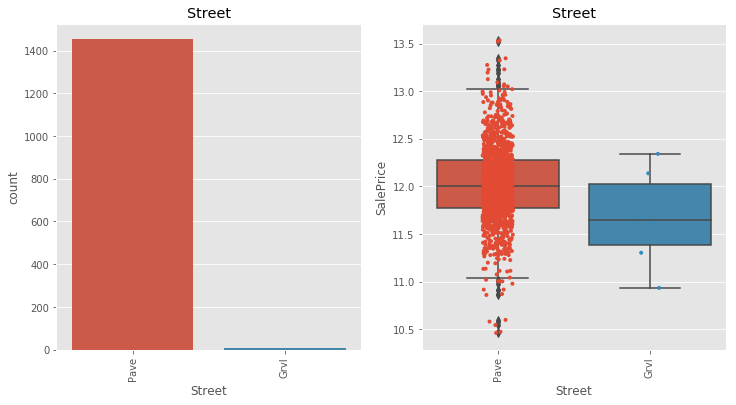

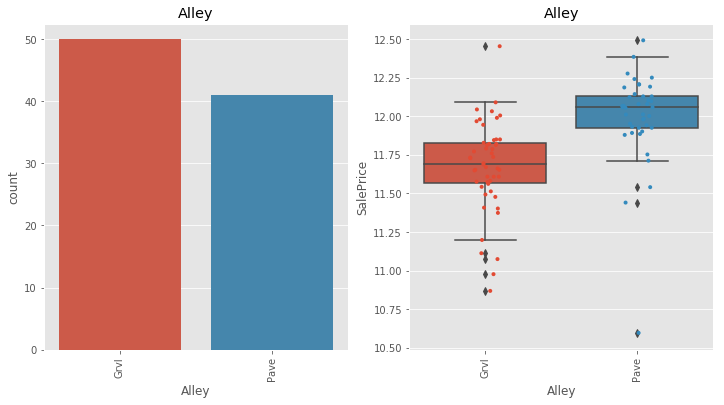

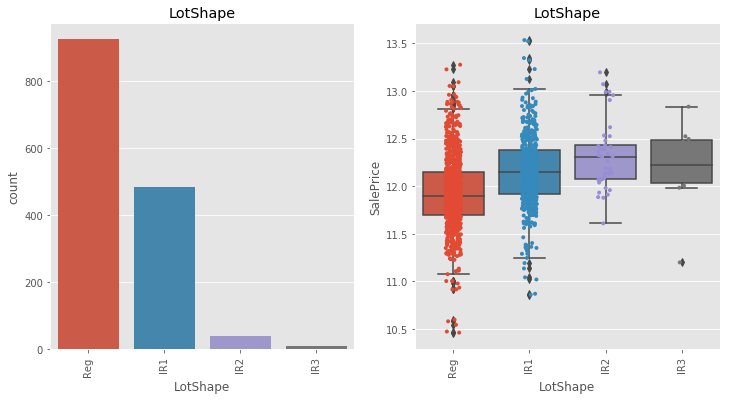

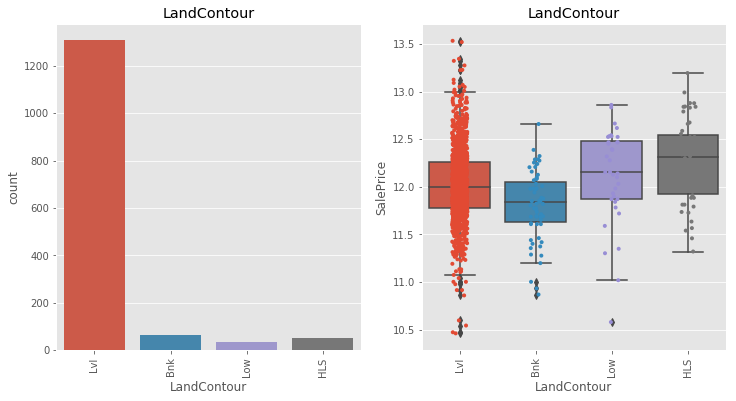

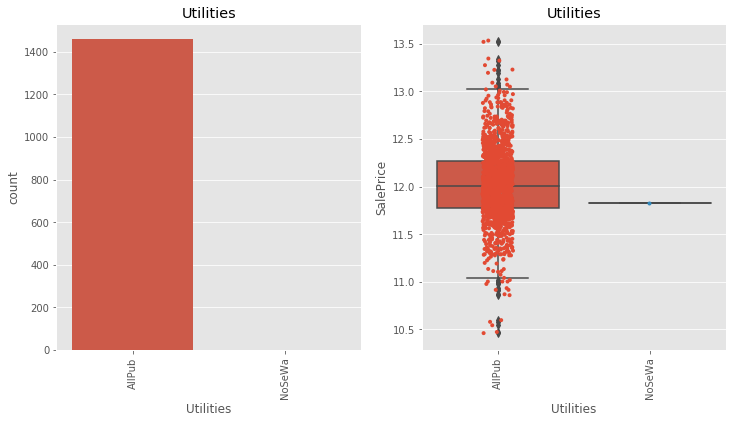

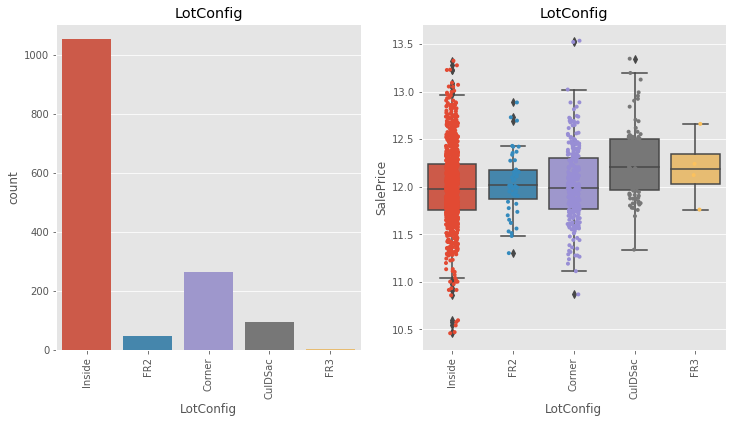

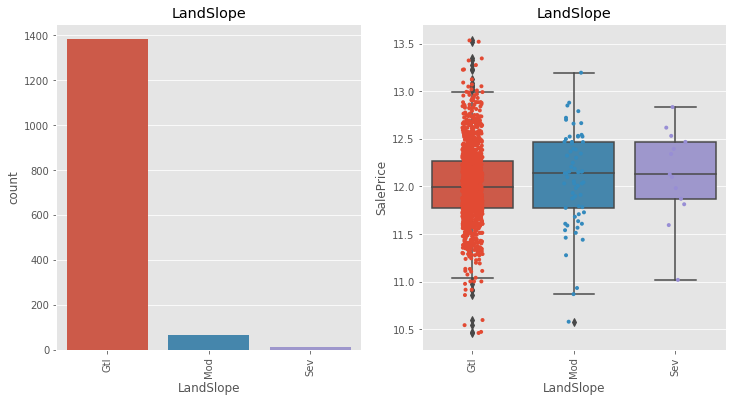

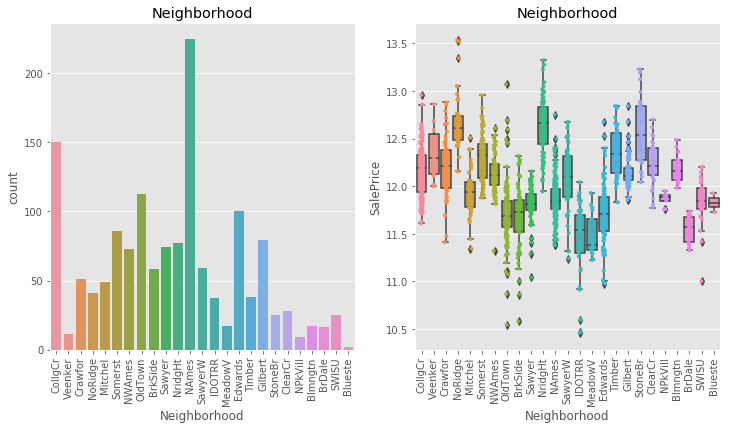

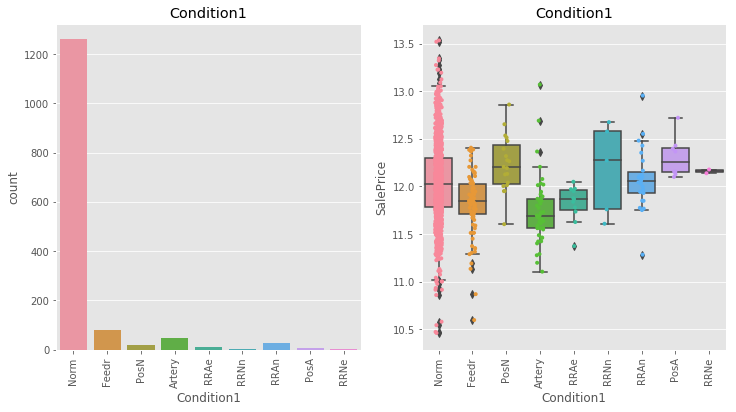

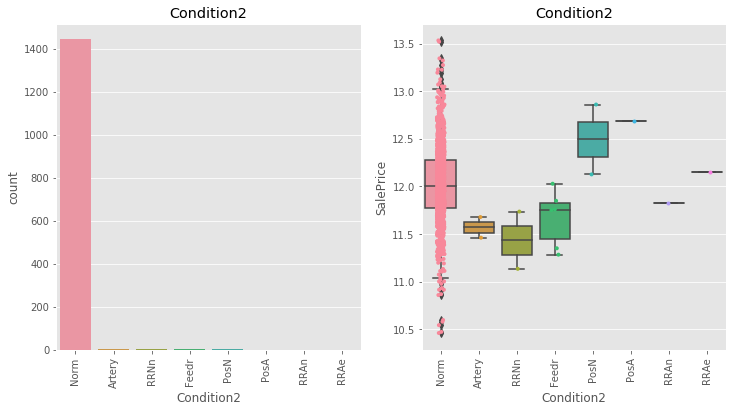

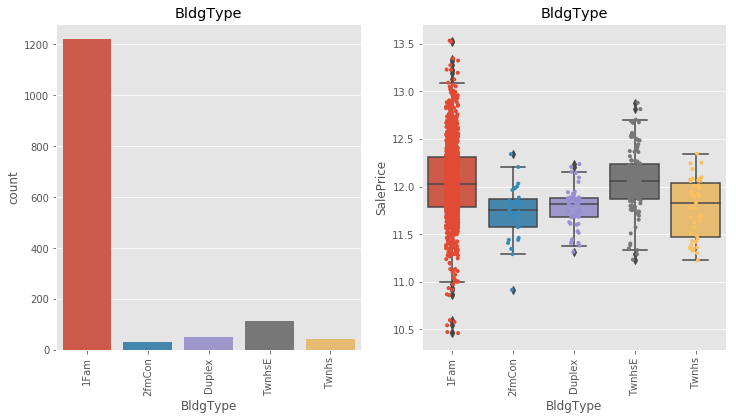

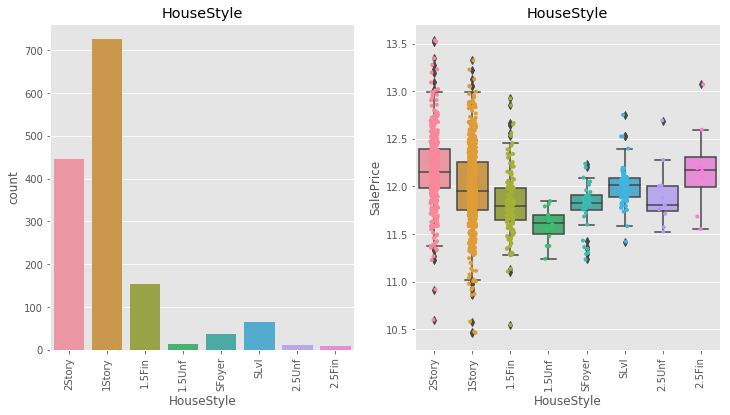

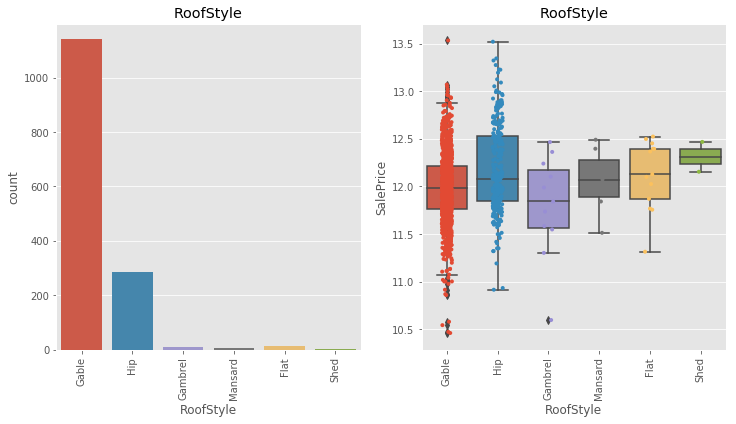

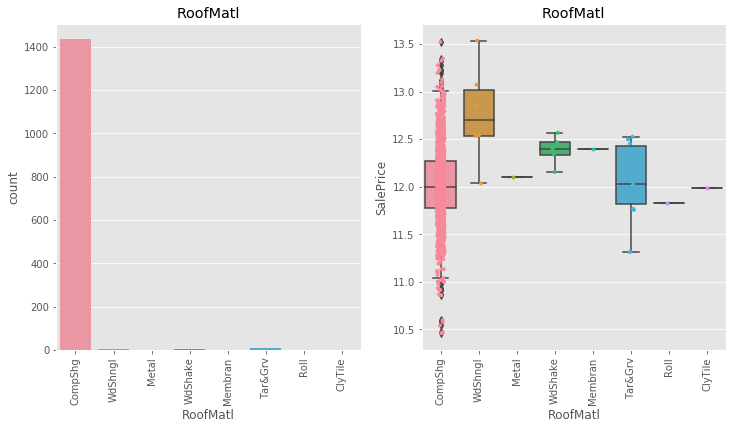

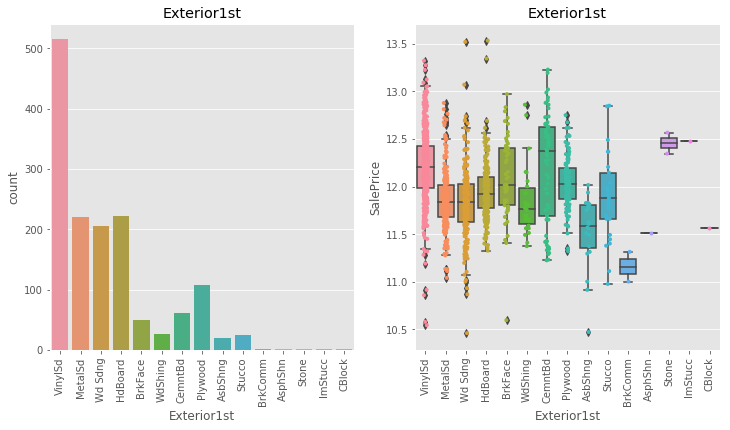

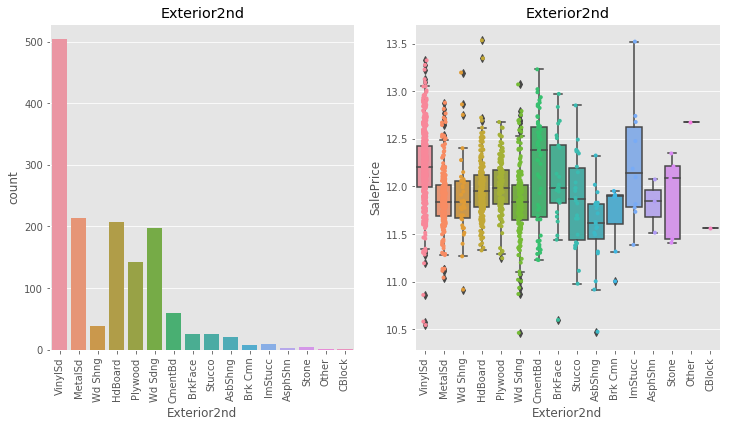

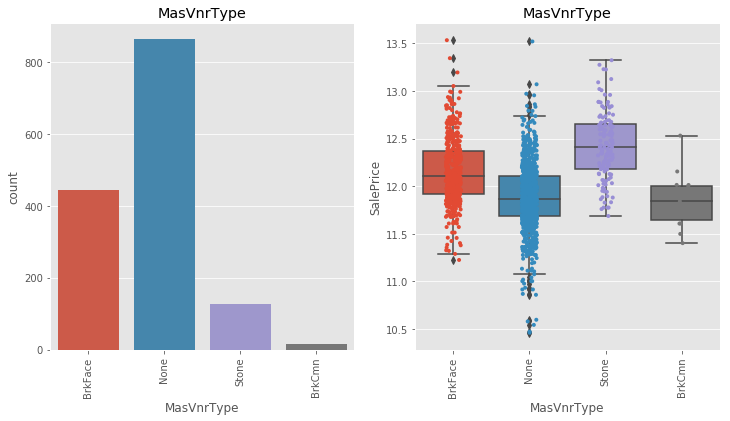

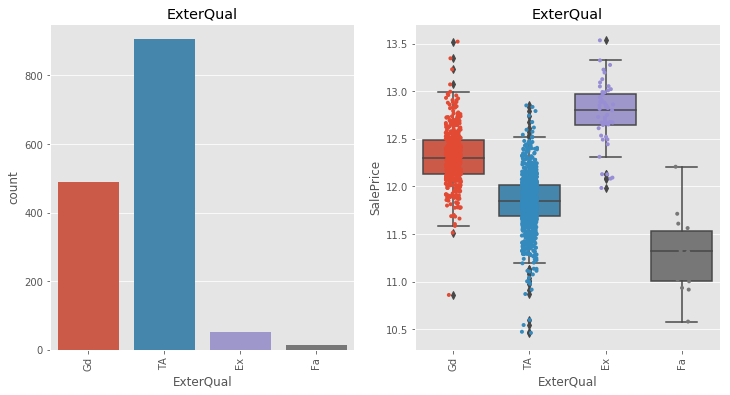

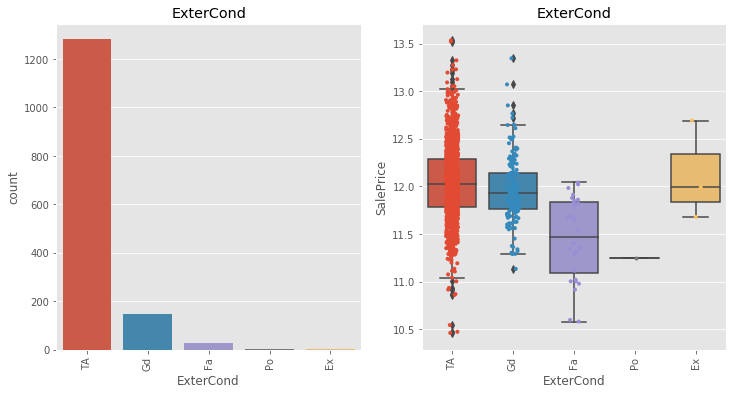

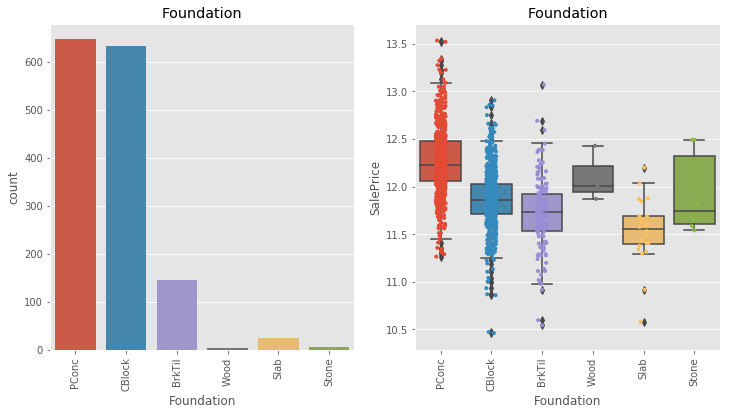

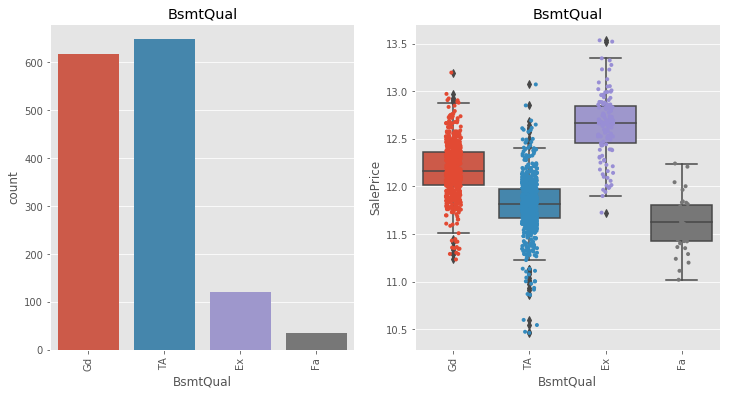

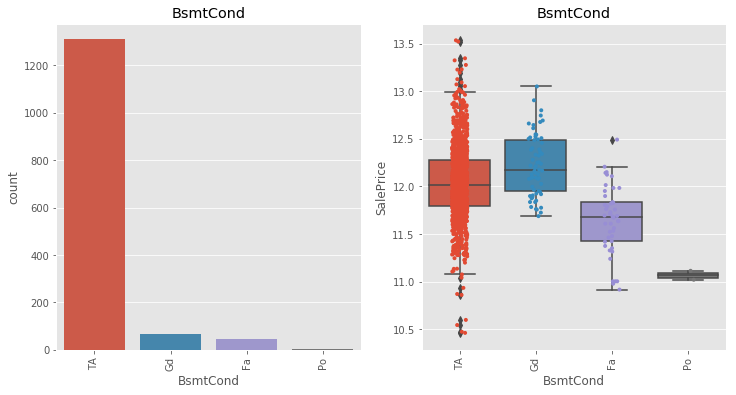

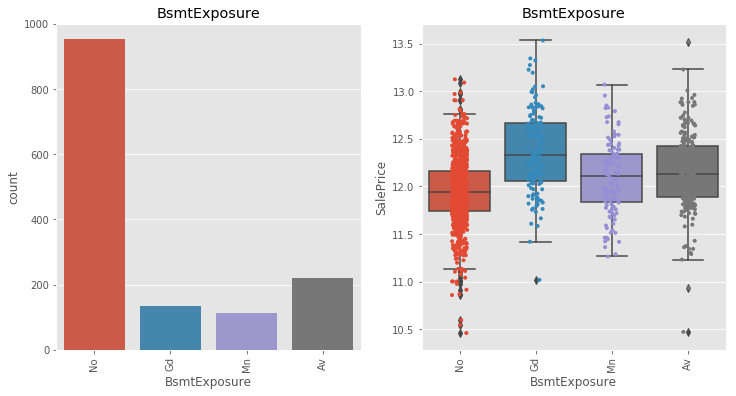

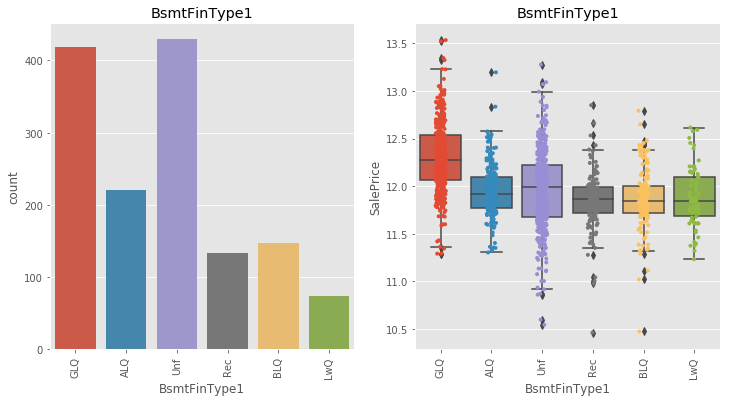

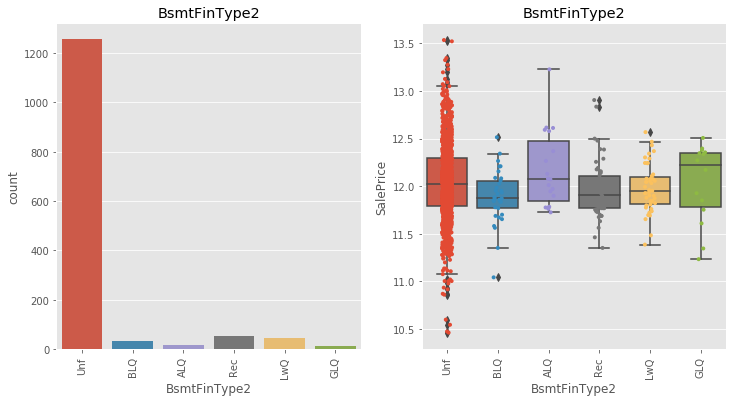

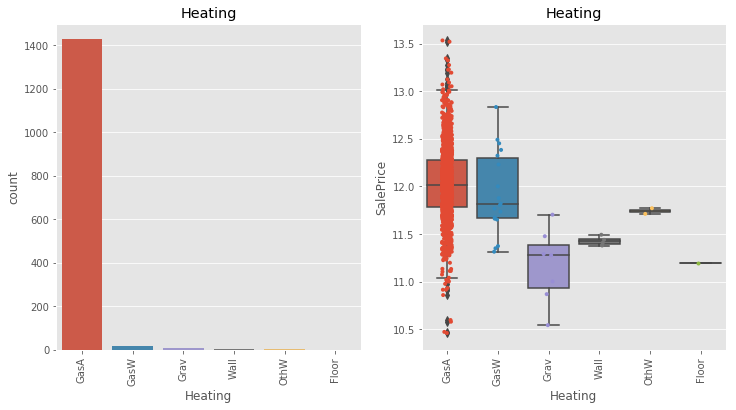

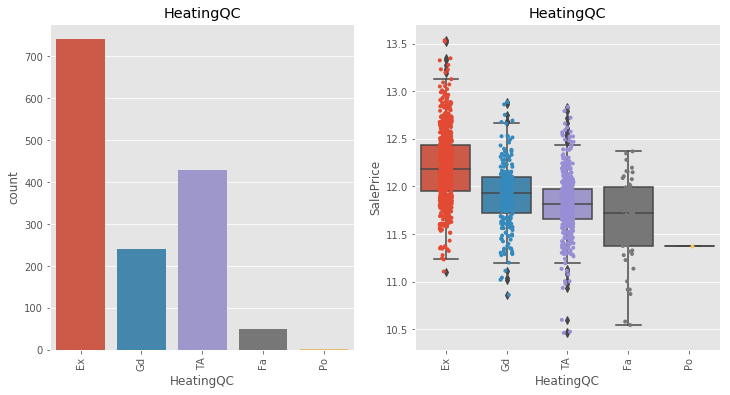

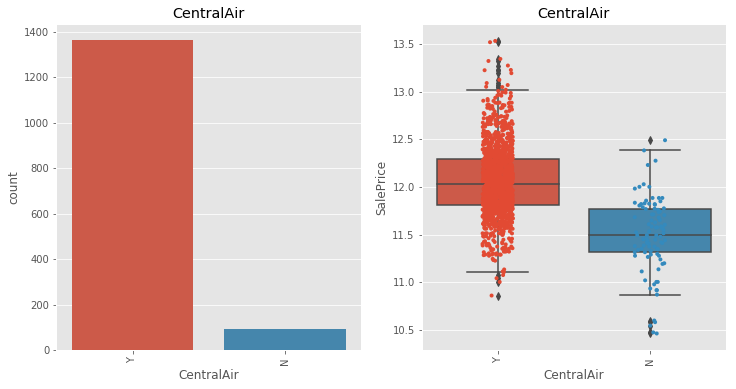

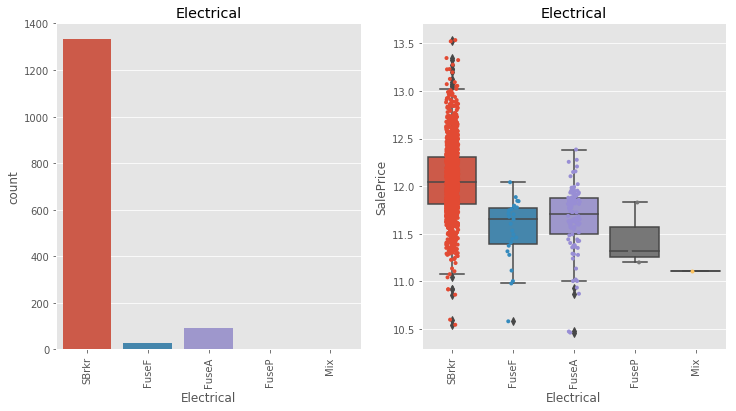

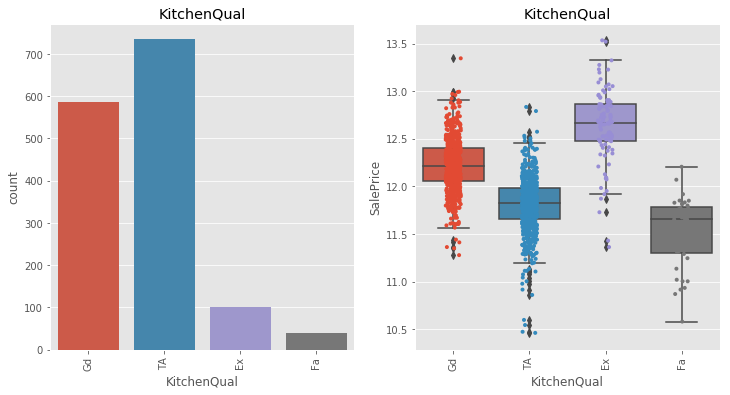

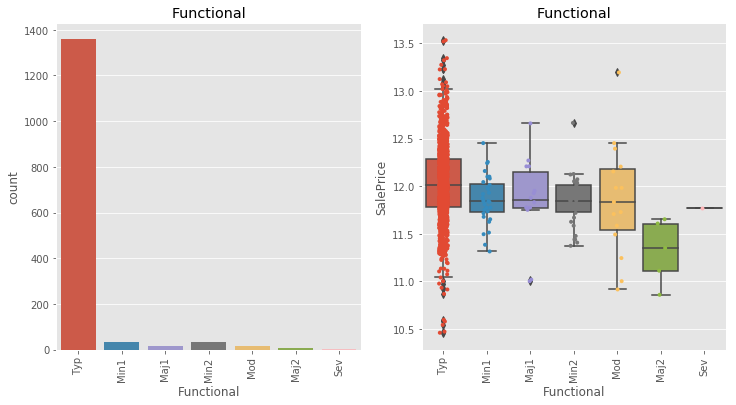

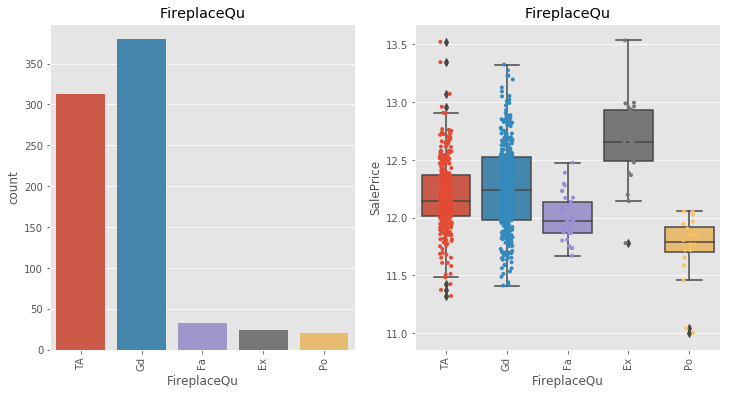

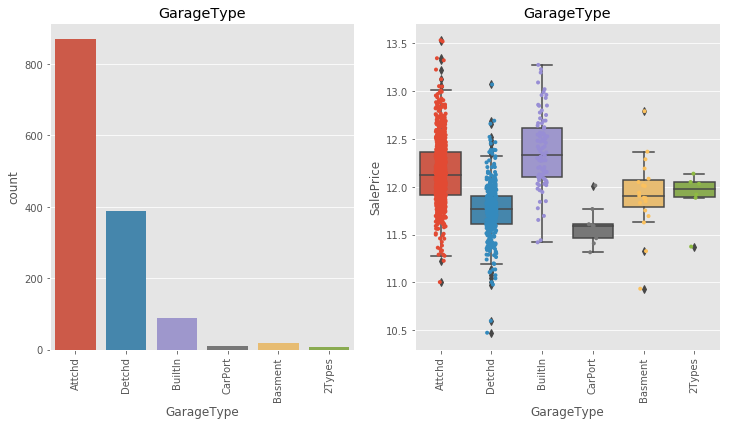

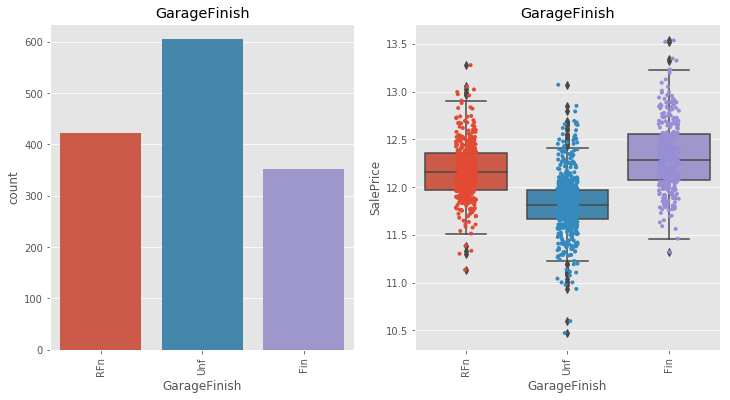

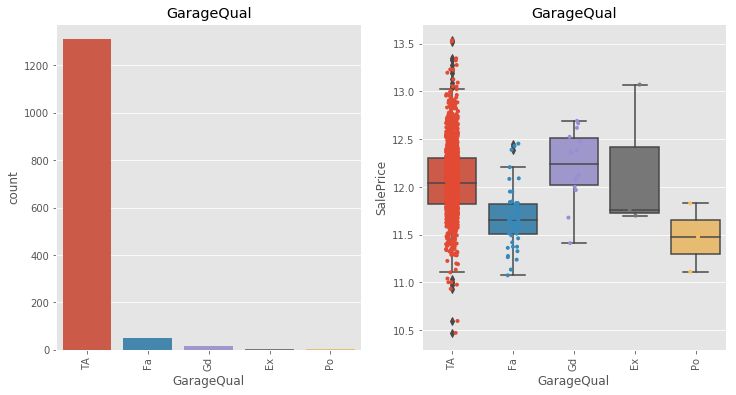

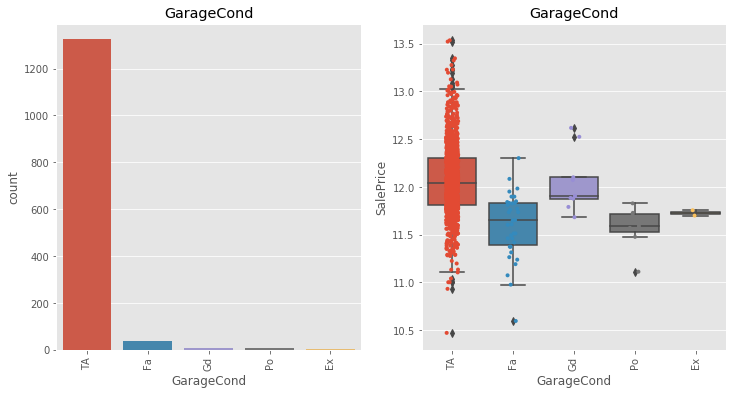

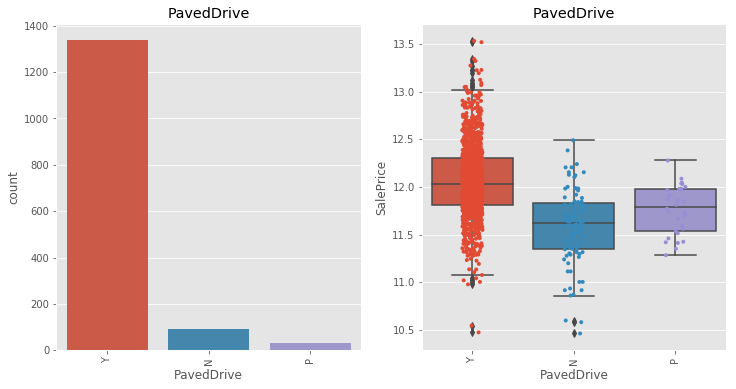

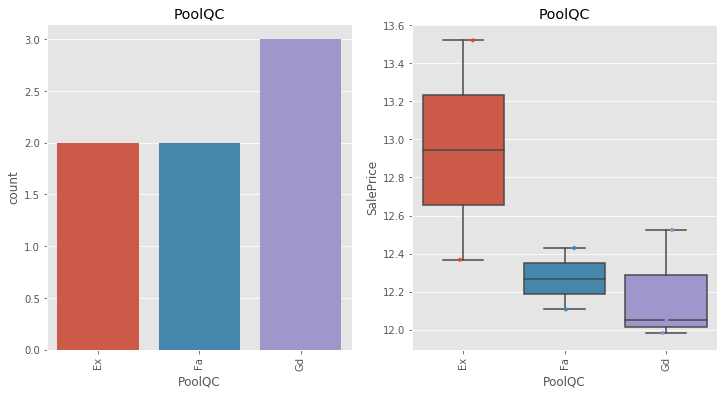

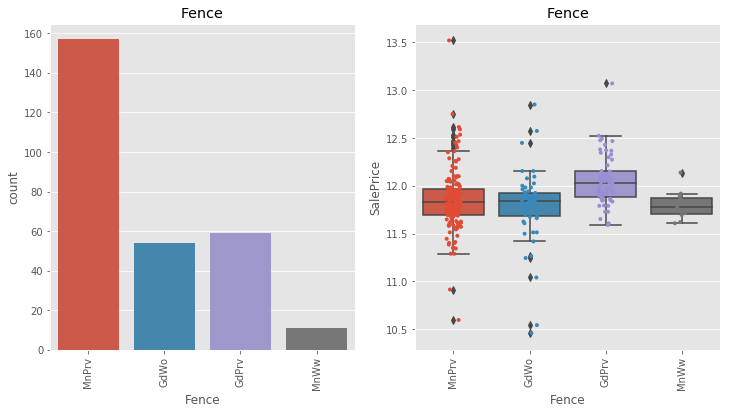

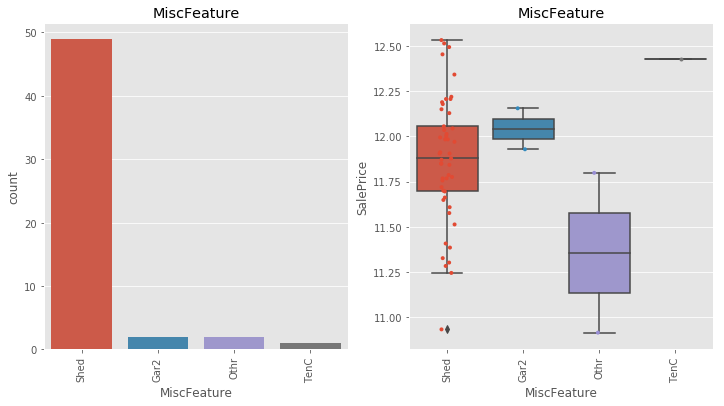

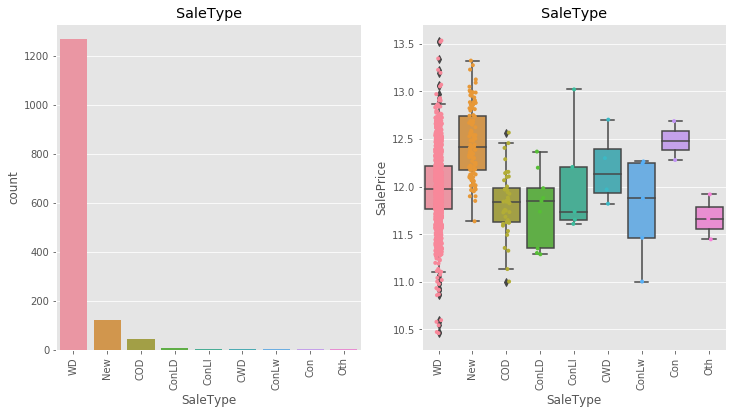

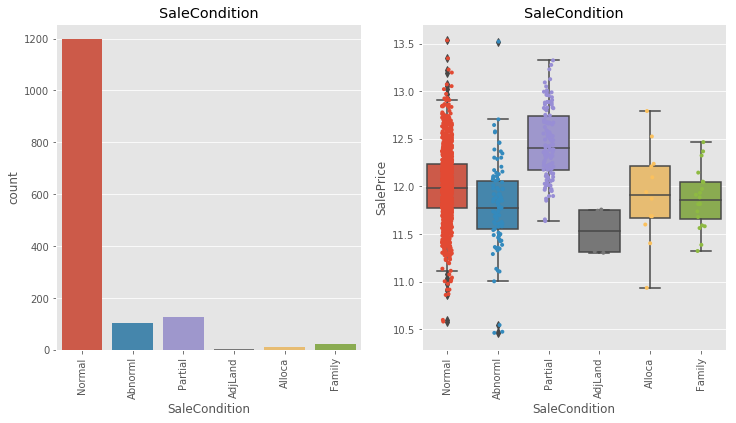

In [9]:
for i in categorical_features:
    
    plt.figure(figsize = (12,6))
    
    plt.subplot(1,2,1)
    sns.countplot(x = train[i], data = train)
    plt.xticks(rotation=90)
    plt.title(i)

    plt.subplot(1,2,2)
    sns.boxplot(x = i, y = "SalePrice", data = train)
    sns.stripplot(x = i, y = "SalePrice", data = train, size = 4, jitter = True, edgecolor="gray")
    plt.title(i)
    plt.xticks(rotation=90)

 * $Hints$ : 
 
   - We can see that many variables for particular categories doesn't have a lot of values (MsZoUtilities, LotConf,  LandSlope, Cond2, RoofStyle, RoofMatl, Electrical ..... ). This suggest to carefully check them later in the $feature$ $engineering$ section (feature construction + features encoding)
    
   - Looking the relation with the salesprice it can be understood which are the variable that most impact on the
      sales price of an house
      
   -    Some features in the given dataset are encoded as categorical, whereas they are actually numerical,
        since there is an inherent ordering. (Check documentation file to look faster)

###### Numerical 

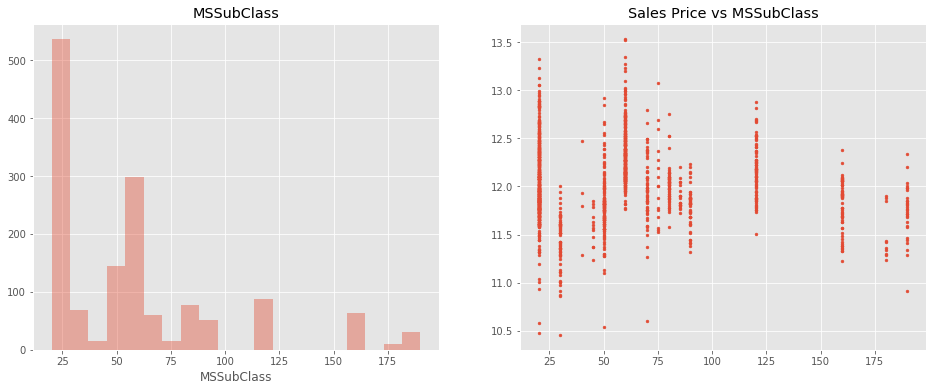

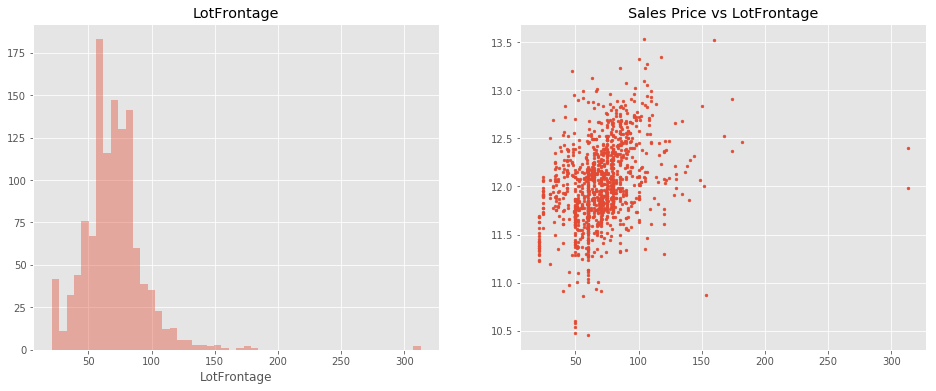

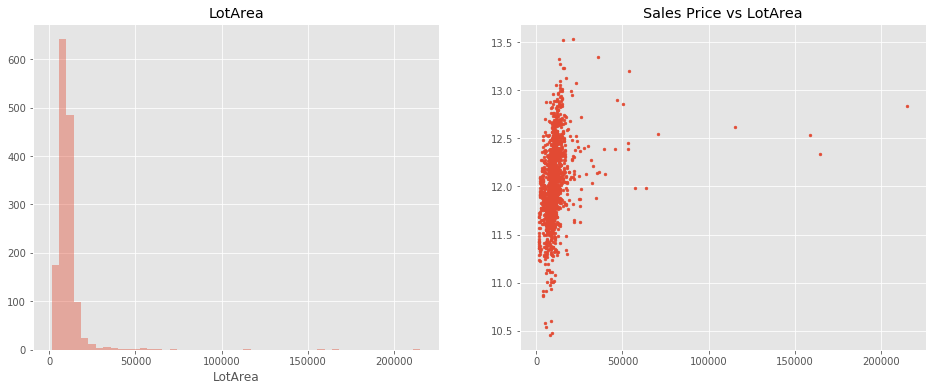

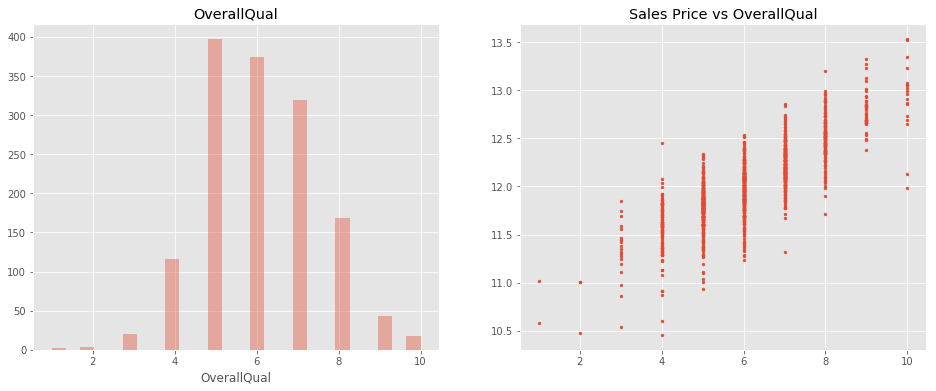

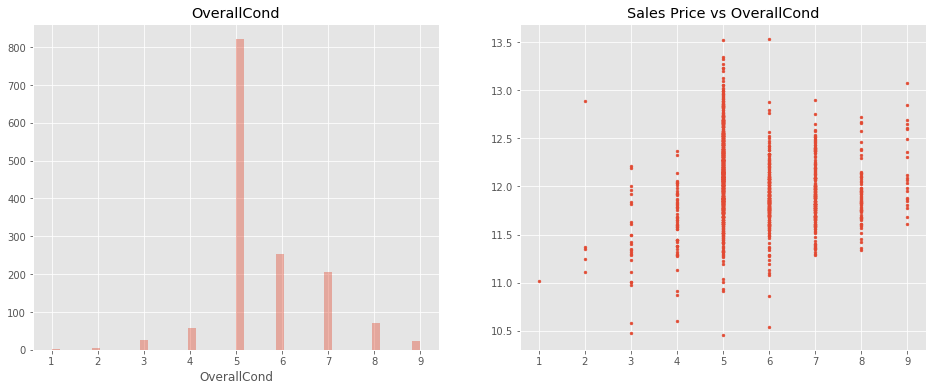

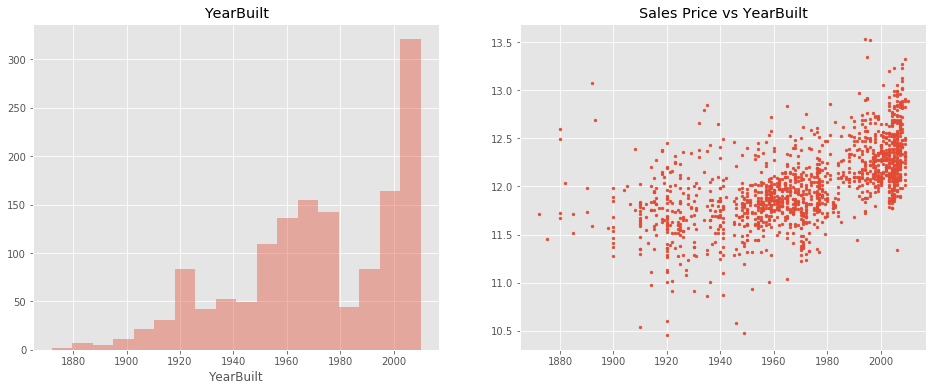

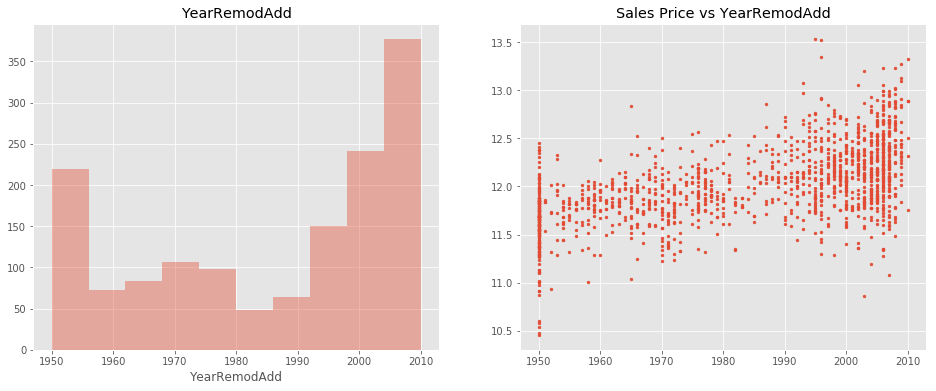

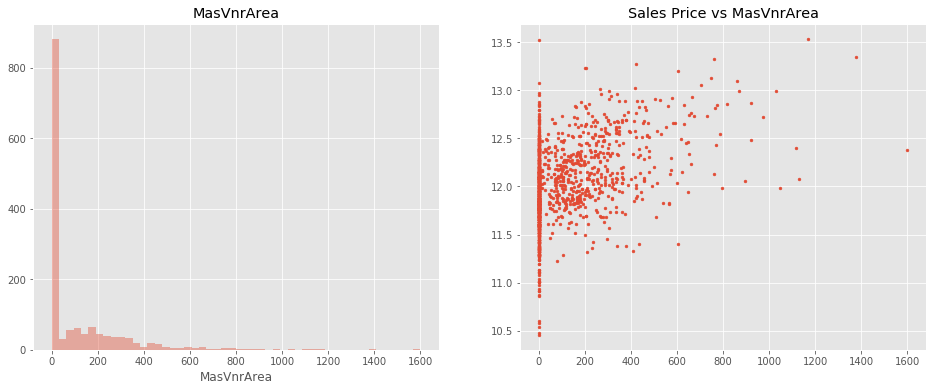

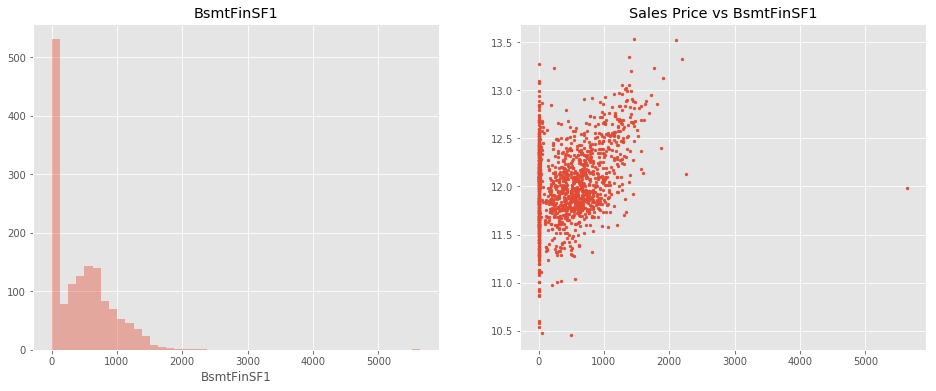

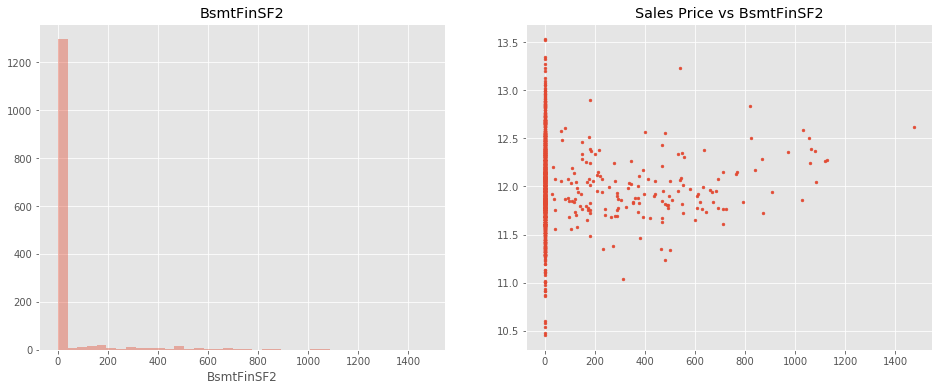

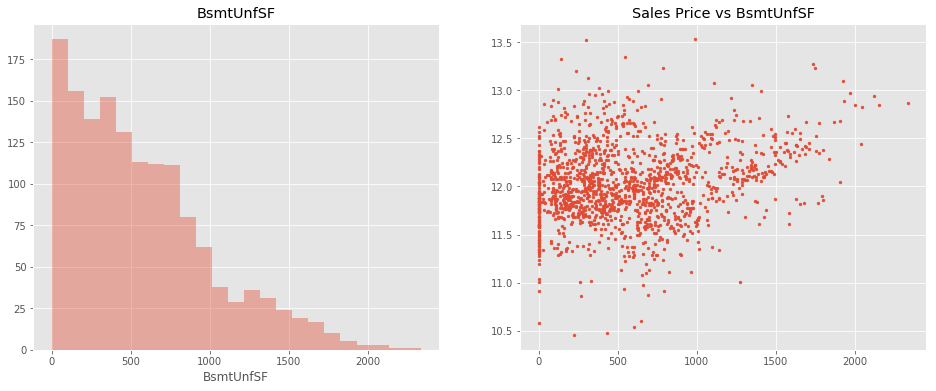

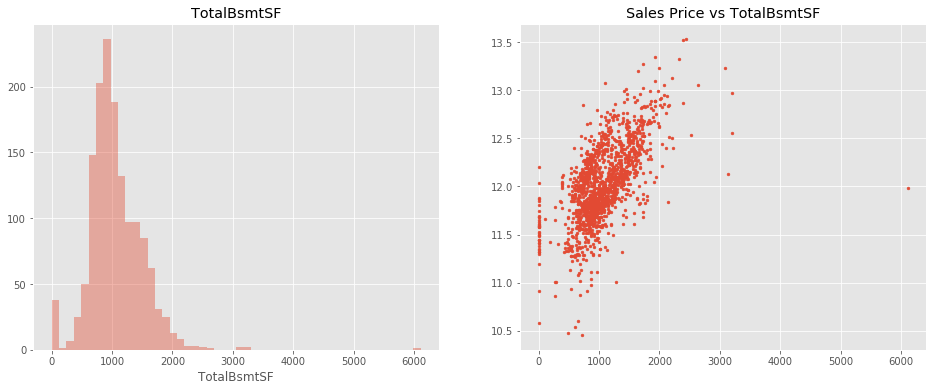

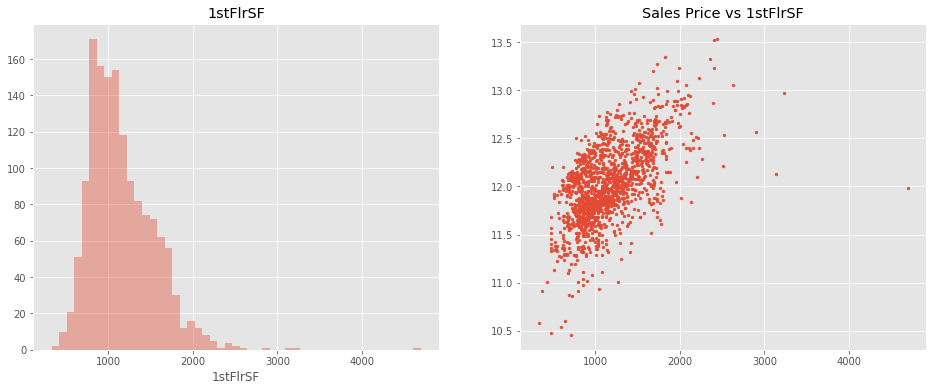

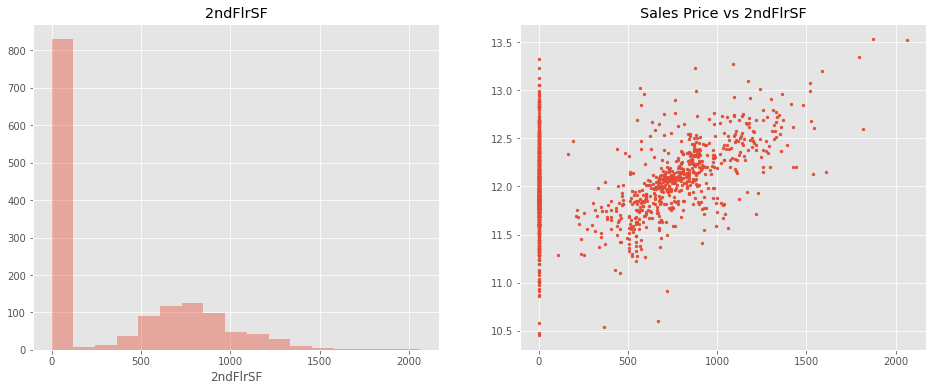

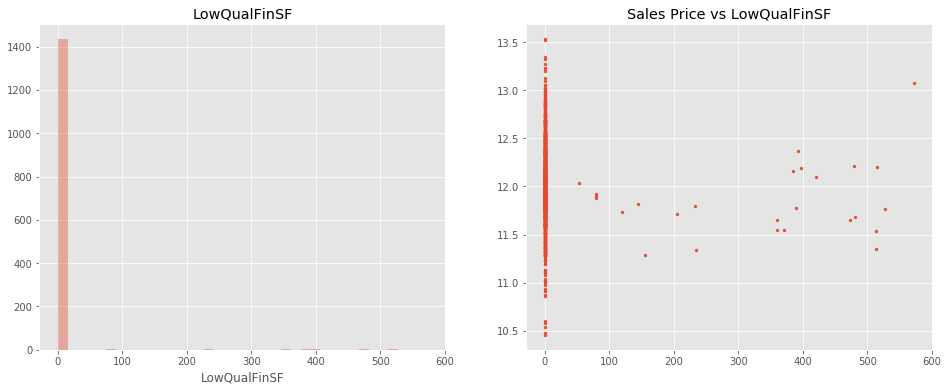

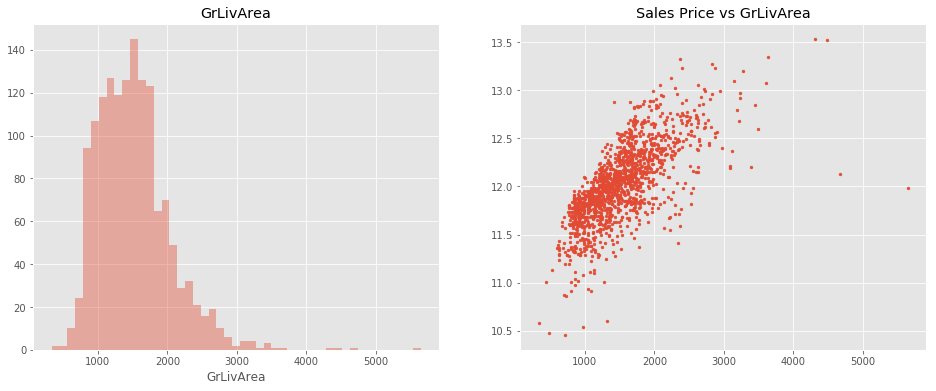

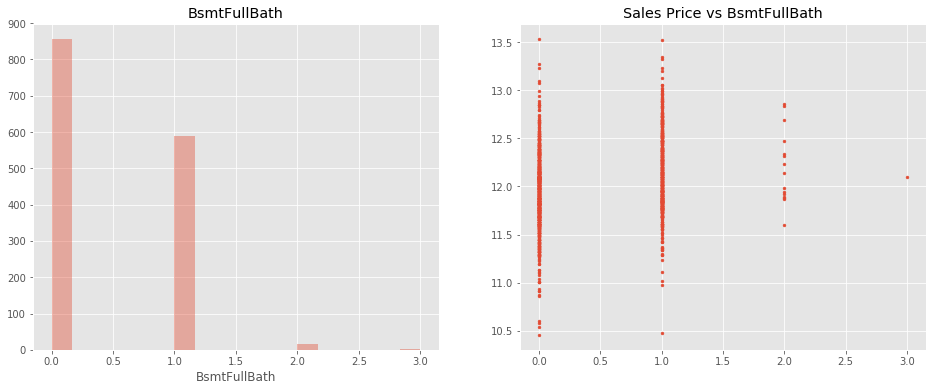

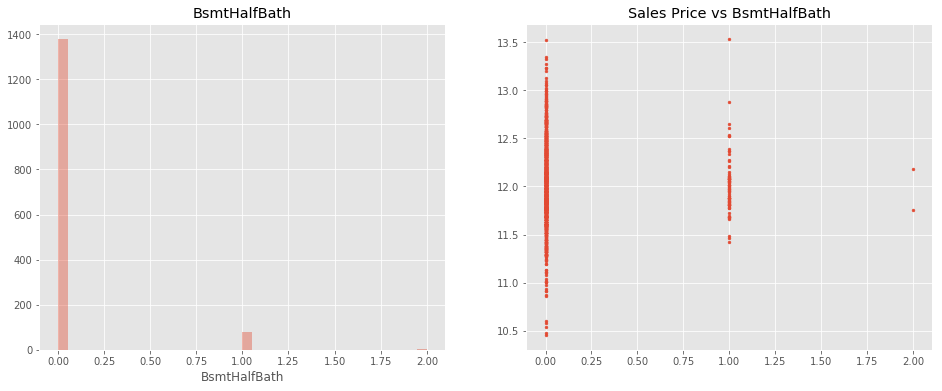

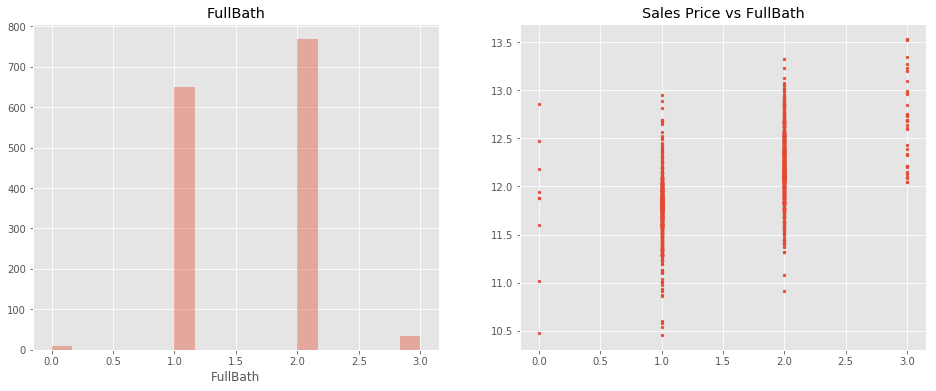

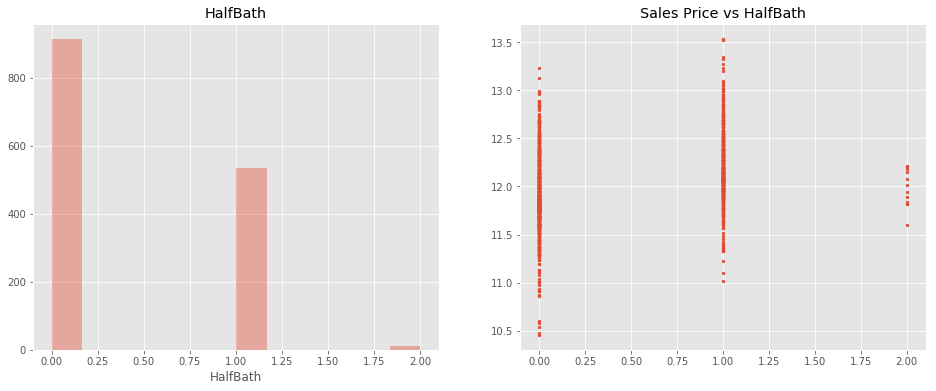

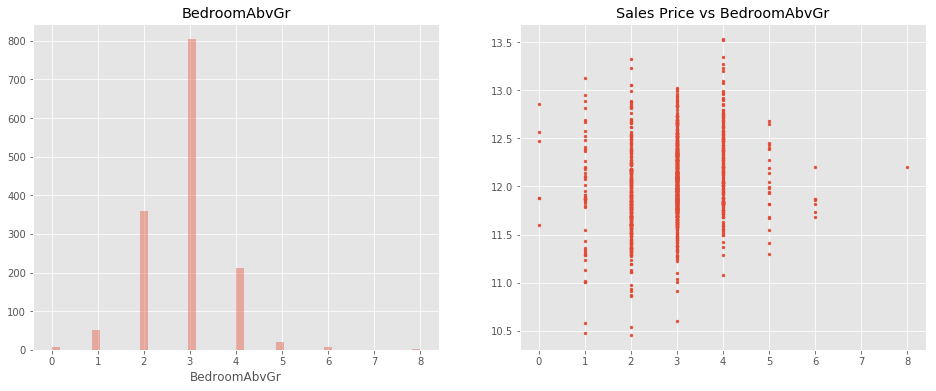

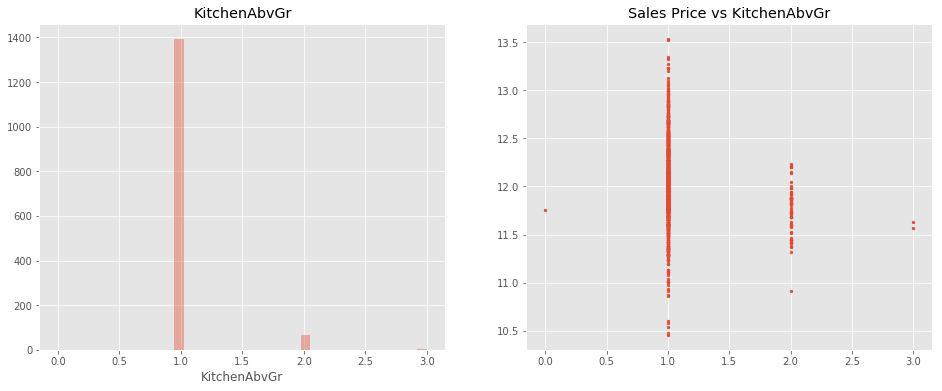

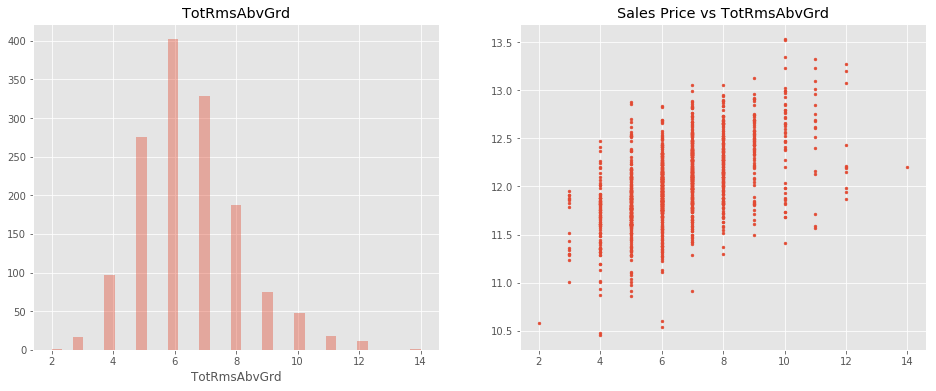

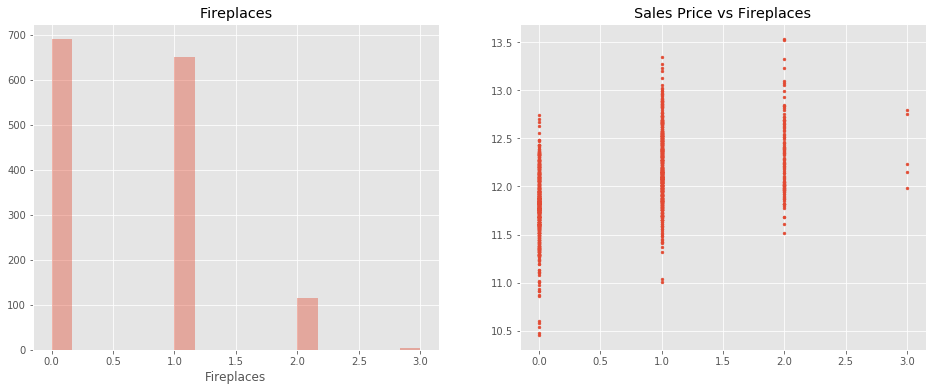

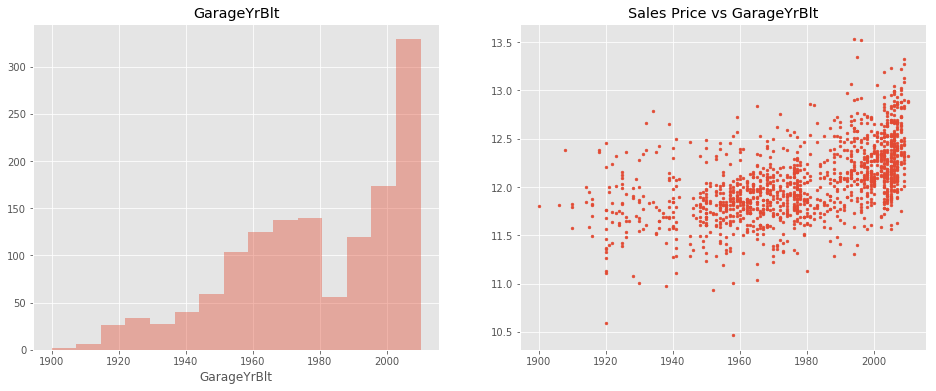

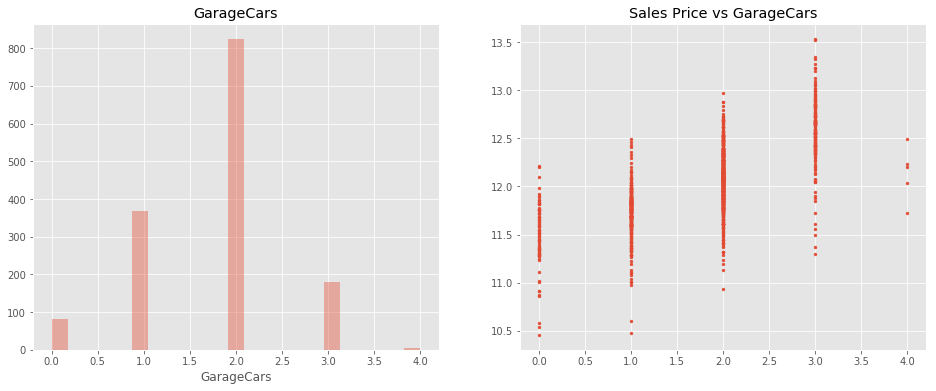

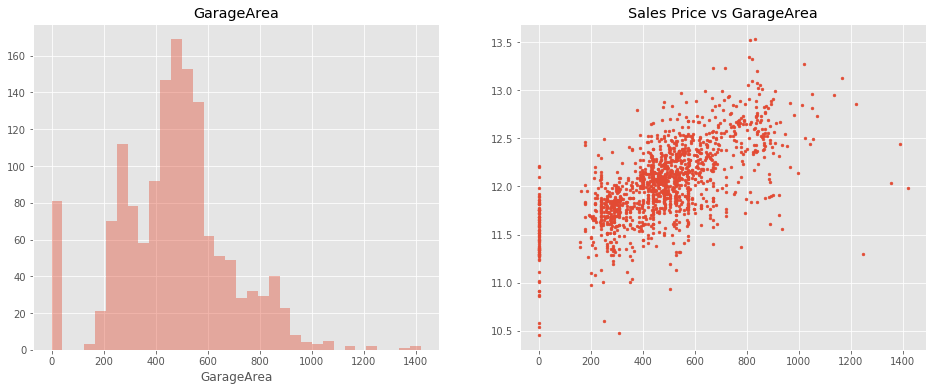

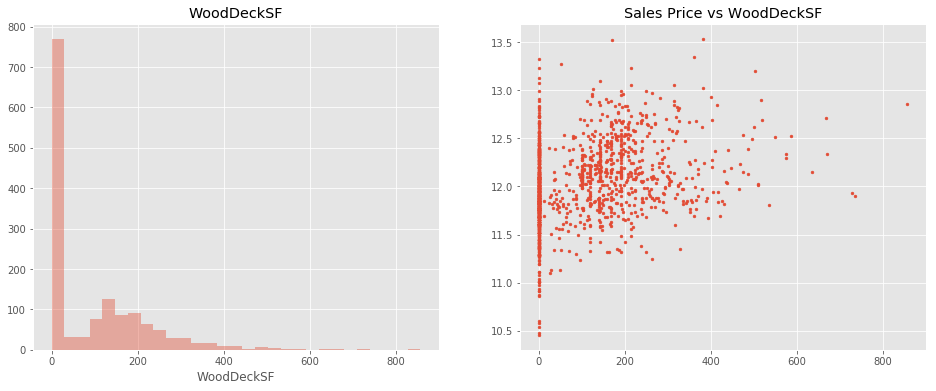

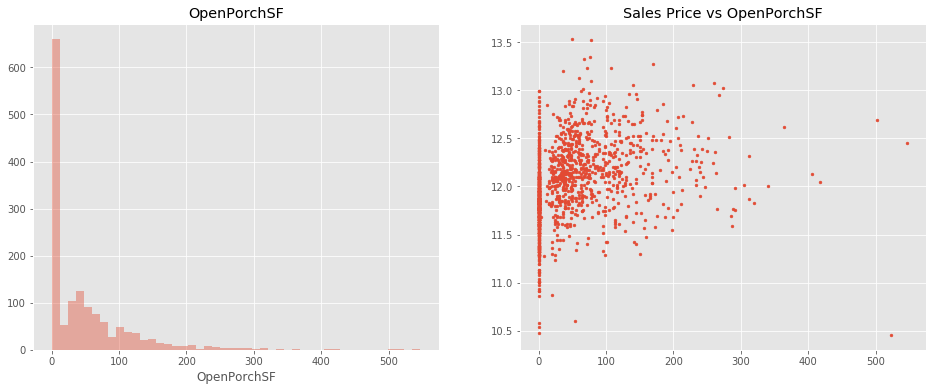

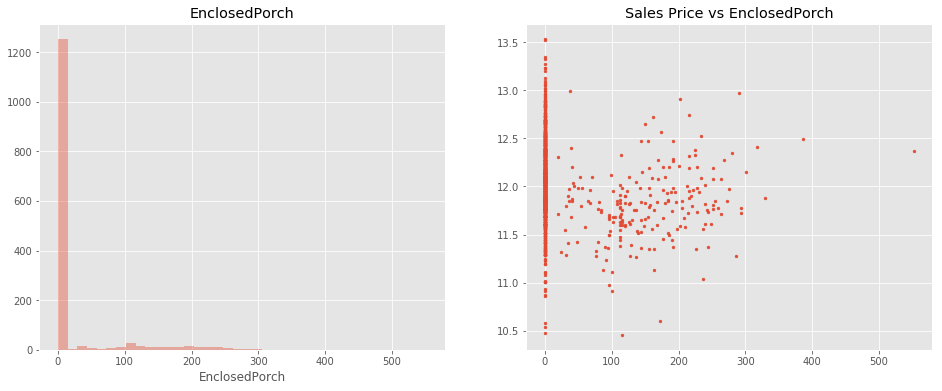

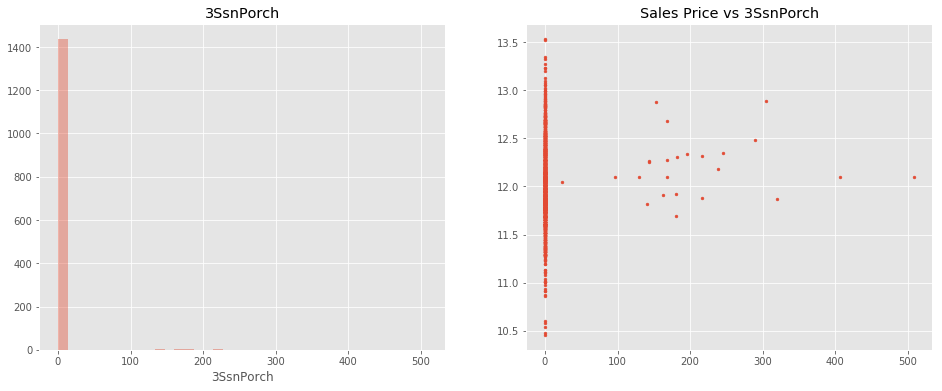

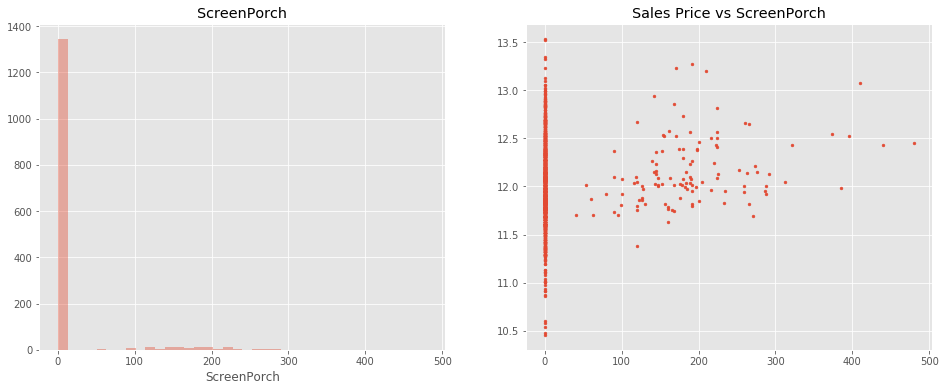

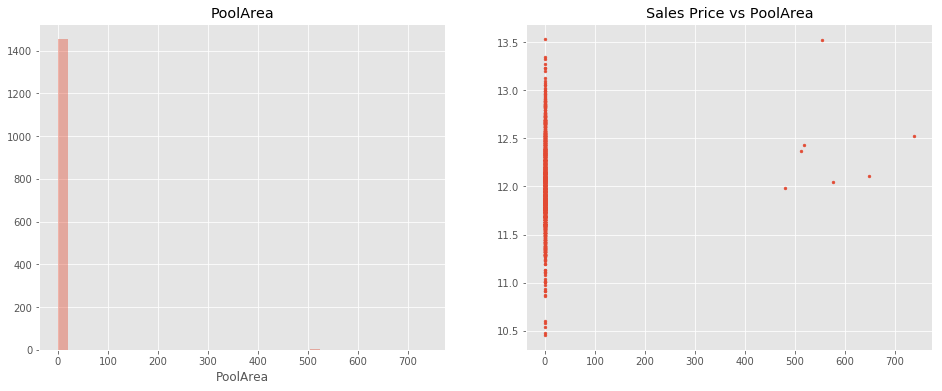

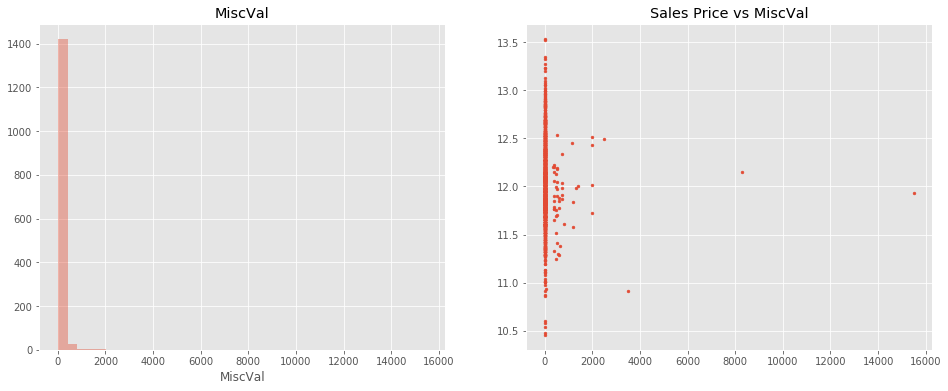

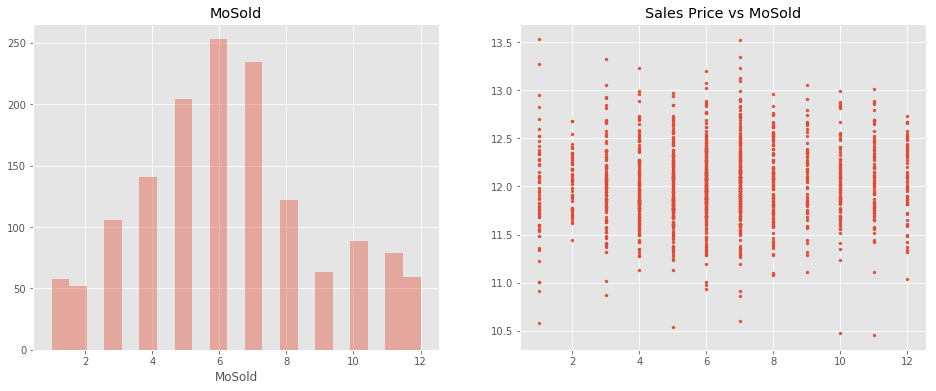

In [10]:
for i in numerical_features[:-1]:

    
        plt.figure(figsize = (16,6))

        plt.subplot(1,2,1)
        sns.distplot(train[i].dropna(), kde = False)
        plt.title(i)

        plt.subplot(1,2,2)
        plt.scatter(x = train[i], y = train["SalePrice"], s = 8)
        plt.title("Sales Price vs %s" % (i))

* $Hints$: 
  - some features are stored in the dataset even if they take an small range of values.
  - many covariates are extremly zero-inflated

In [11]:
# Get uniqueness of each numerical variable
unique = train[numerical_features].T.apply(lambda x: x.nunique(), axis=1)
unique

MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
dtype: int64

###### CORRELATION WITH THE TARGET

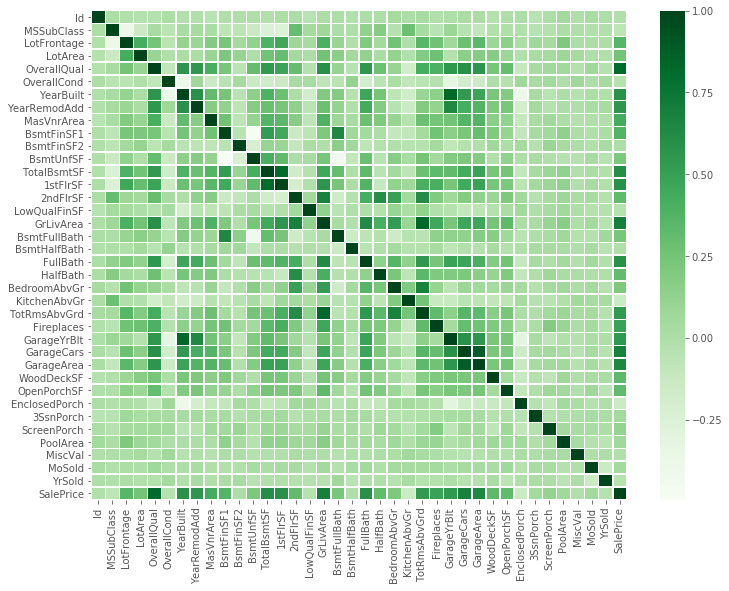

In [12]:
# Correlation Matrix Heatmap
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="Greens",linewidth = 0.5)

* Now let's plot the top10 correlated features 
* Looking at the first column we can see the most correlated variables with saleprice

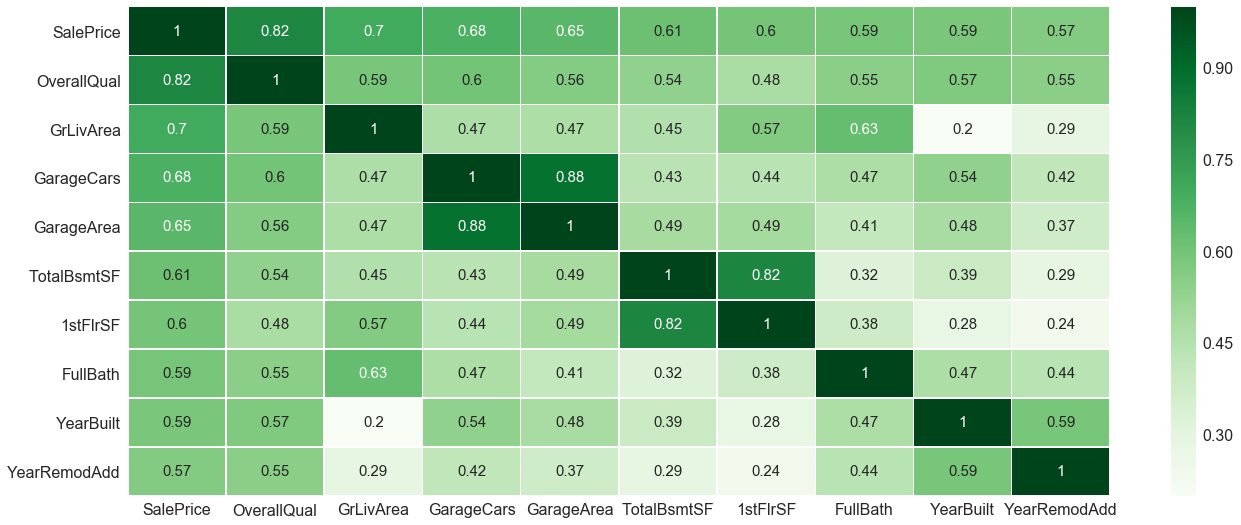

In [13]:
k = 10
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.6)
plt.figure(figsize = (22,9))
hm = sns.heatmap(cm,  cmap="Greens",linewidth = 0.5,cbar=True, annot=True, annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

##### OUTLIERS

 Looking for outliers, as indicated in the reference
 We can see at the bottom right two with extremely large GrLivArea 
  that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.

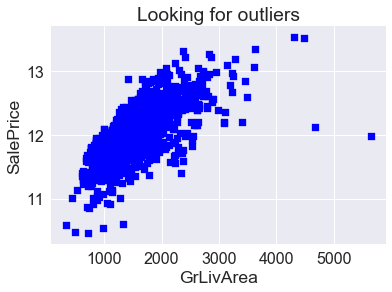

The new shape of the train dataset is  (1456, 81)


In [14]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
print("The new shape of the train dataset is ",train.shape)

$Note$ :
Outliers removal is note always safe. We decided to delete these two as they are very huge and really bad ( extremely large areas for very low prices).
There are probably others outliers in the training data. However, removing all them may affect badly our models if ever there were also outliers in the test data. That's why , instead of removing them all, we will just manage to make some of our models robust on them. You can refer to the modelling part of this notebook for that.

### 2 DATA PREPROCESSING 

Data preprocessing is a very critical step in any data mining process, it is more difficult to discover data patterns during the training step if there is significant noise and unreliability within the data

###### DROPPING VARIABLES

* For submission purposes we stored train and test ID in two varibles

In [15]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("The train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size after dropping Id feature is : (1456, 80) 
The test data size after dropping Id feature is : (1459, 79) 


###### DATA CLEANING

* Here i'm going to merge the train and test into a single dataframe for data cleaning purpose.
  After observing many kernels it seems that this is the proper way in kaggle. 
  In real life project when we build models on historical data (we split dataset in train+test to do our validations)
  is also the same, even if we could encounter problems when we will face future data.
  This is exactly meaning of test set in kaggle leaderboard.
  
*  One important reason to combine sets is to maintain consistency between the sets. For example for categorical  encoding, If all categories aren't present in both sets (and even if they are) they might be labelled differently if done in two separate operations. 

  
  $Reference$ : https://www.kaggle.com/c/titanic/discussion/37730

In [16]:
# Merge the dataframes for preprocessing purposes.
# Then it will be splitted again 
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
df = pd.concat((train, test)).reset_index(drop=True)
df.drop(['SalePrice'], axis=1, inplace=True)
print("df size is : {}".format(df.shape))

df size is : (2915, 79)


*  Pandas_Profiling is a package for missing data that gives a high level overview
   of the dataset as well as detailed information for each column 
   in the dataset including the number of missing values

In [17]:
pandas_profiling.ProfileReport(df)

This package provide very usefuls insights about the nature of data: some steps need to be taken in consideration.

* How to treat Missing values ? 
* How to treat Zeros values ? 
* There are many zero-inflated covariates ("nested" variables ) 
* There is skewness in many numeric variables
* Pearson and Spearman correlation plots shows that there is some kind of multicollinearity  

###### MISSING VALUES: Exploratory tools

 $Reference$ : https://github.com/ResidentMario/missingno/blob/master/README.md

It can be seen there is some sistematicy in the missing values for some variables


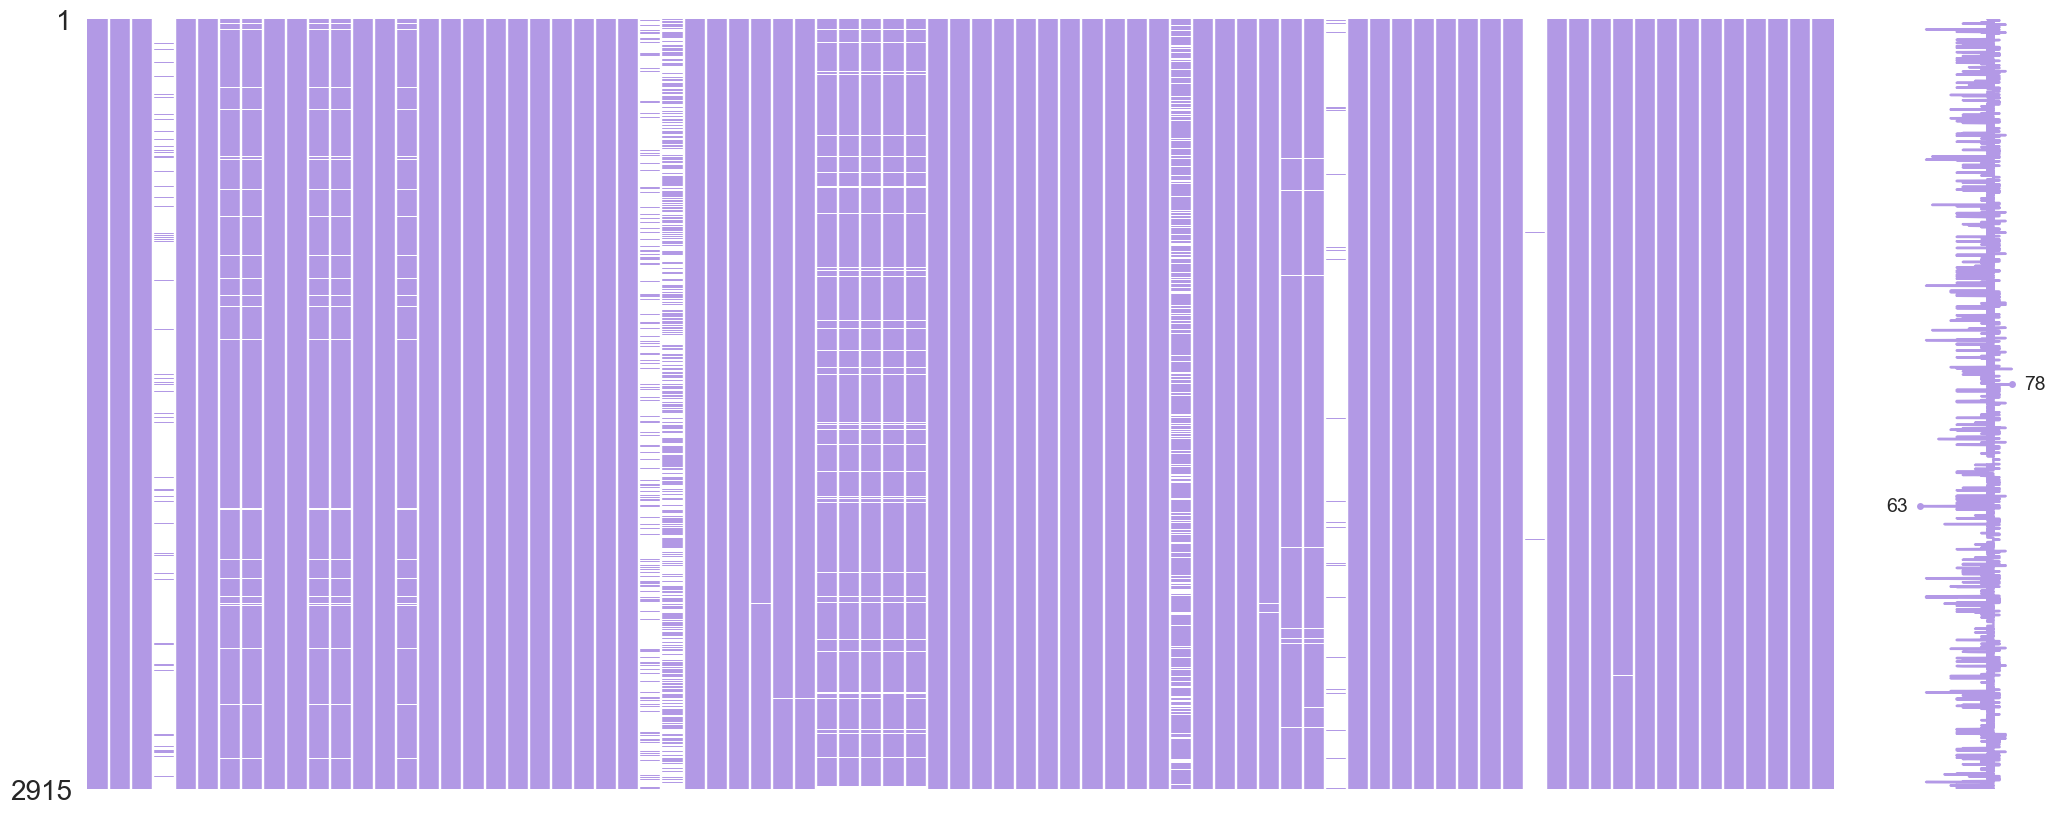

In [18]:
# Missigno module provides a small toolset of easy-to-use missing data visualizations
msno.matrix(df, color = (0.70,0.60,0.90))
print("It can be seen there is some sistematicy in the missing values for some variables")

In order to understand the missing data mechanism, more in- depth analysis is needed

* The heatmap plot allow you to studies the relationship between the missing data of the variables and not the   relationship between the variables. We use this plot to understand if there is a relationship between the missing data of the various columns

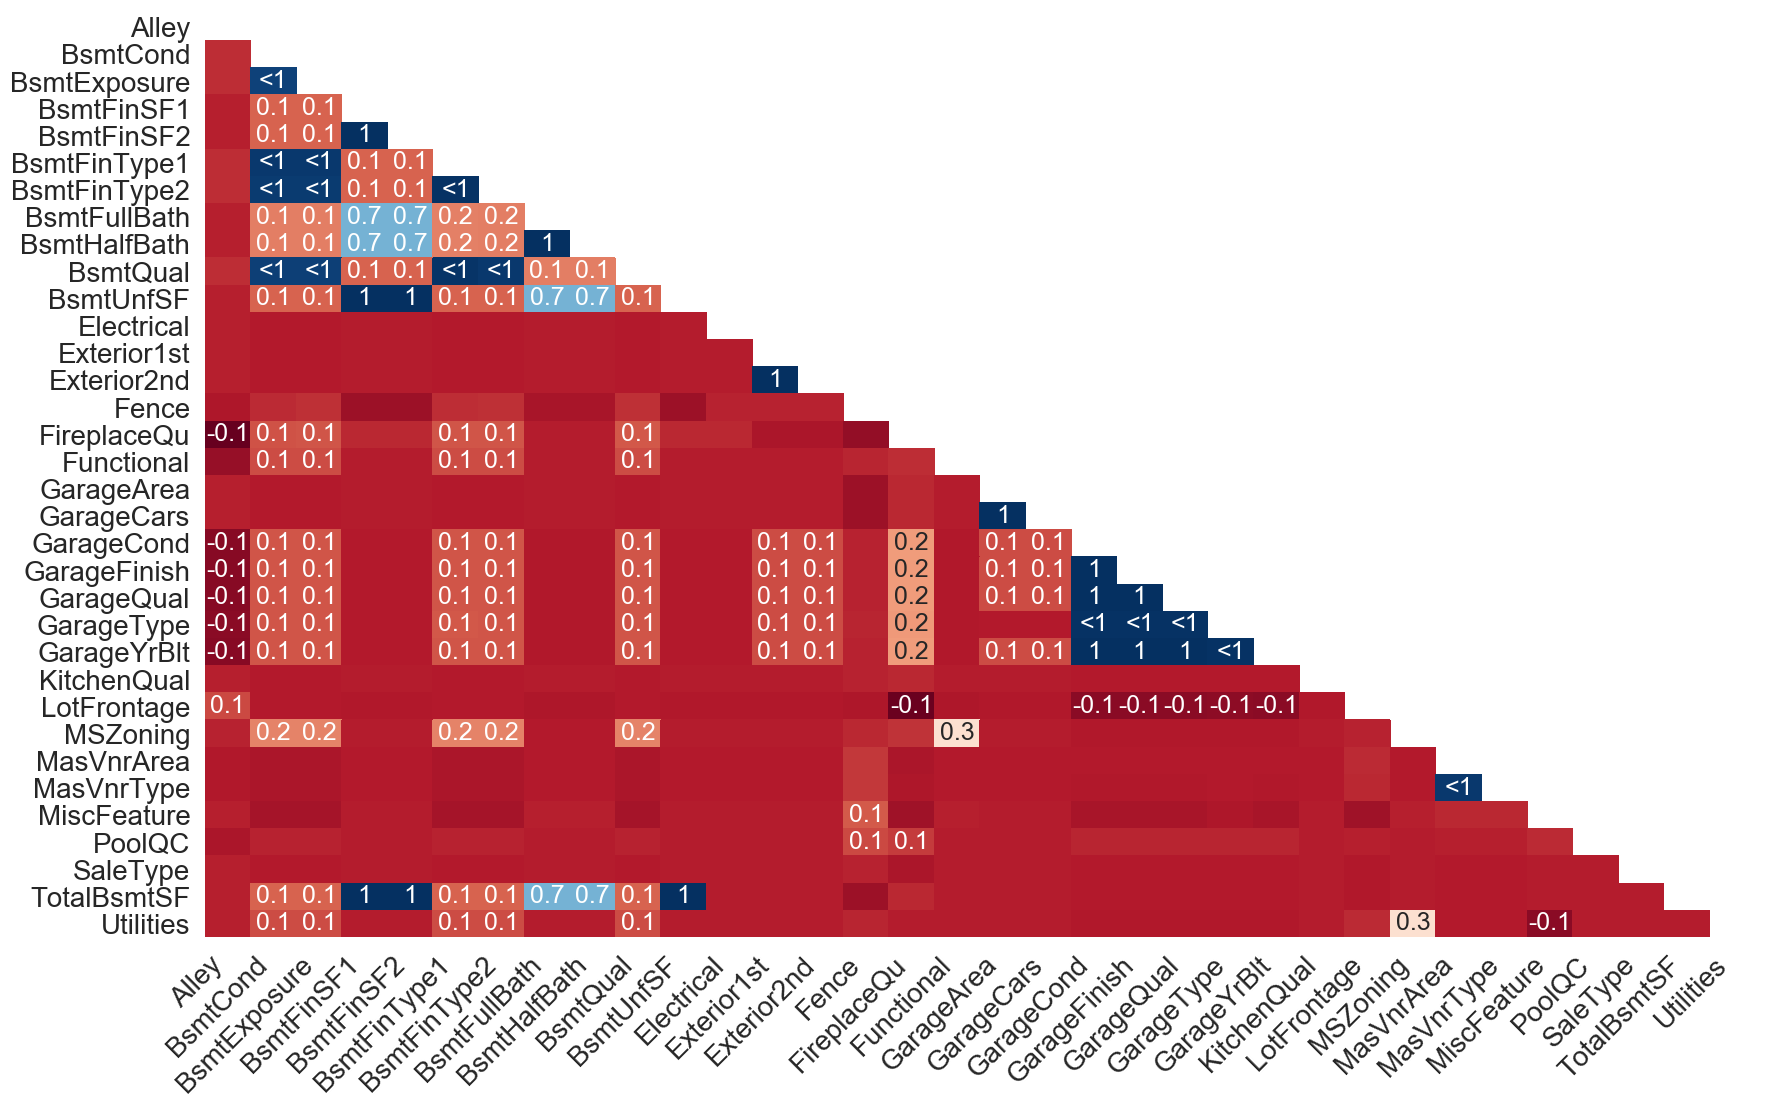

In [19]:
msno.heatmap(df,sort = True,fontsize = 20)


* Interprerting this graph is not easy: we have many variables and many relationship
  - we can see that variables happens only if others happens (take values $1$) meaning that many variables depends on
    the existence of the "main" one (Total basement
  - we can see that Alley and LotFrontage tend to reduce the appearance of Garage variables which is also logical.
  - Entries marked $<1$ have a correlation that is close to being exactly positive. This indicates that for few records one variable is stored and the other not! this can thought as a lack of information in the data
 
 
This analysis seems quite complex to carry on. In order to proceed i explored some kernels to obtained more hints about this phase

*******
*******

* Let's now plot the total number of missing values in each column 

5 attributes have more than 50% of missing data. Most of times NA means lack of subject described by attribute, like missing pool, fence, no garage and basement.


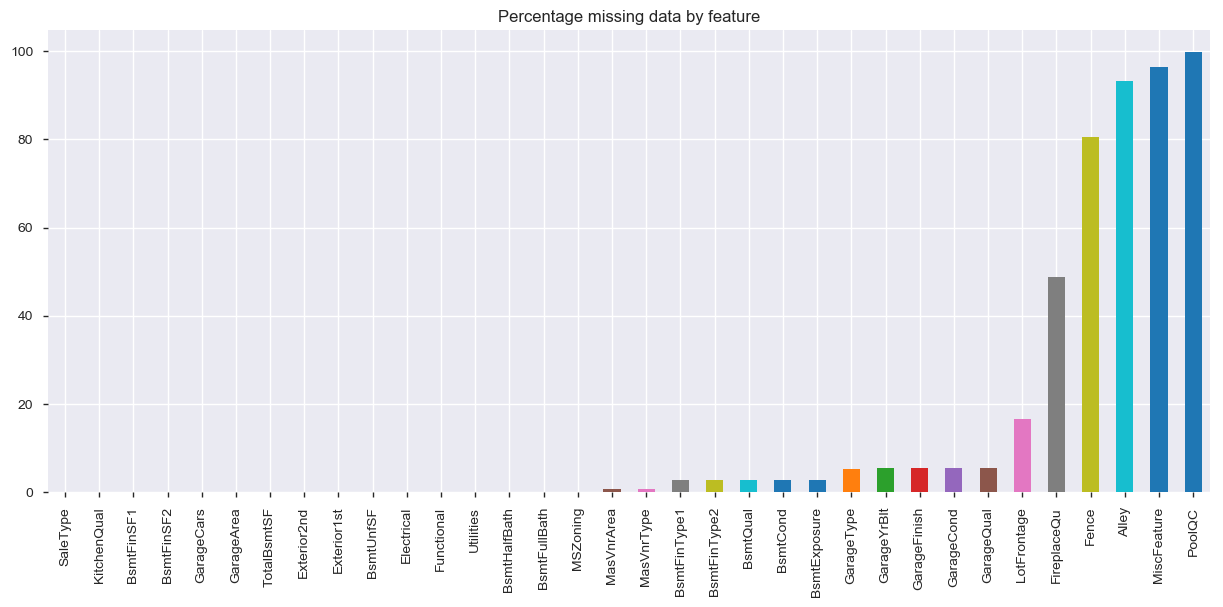

In [20]:
f, ax = plt.subplots(figsize=(15, 6))
missing = df.isnull().sum()/ (len(df)) * 100

# its necessary just 1 missing information
# look the graphs below to see how many
# variables just miss 1 values

missing = missing[missing  > 0] 
missing.sort_values(inplace=True)
missing.plot.bar()
plt.title('Percentage missing data by feature', fontsize= 12 )
print("5 attributes have more than 50% of missing data. Most of times NA means lack of subject described by attribute, like missing pool, fence, no garage and basement.")

##### Imputation

 * After collecting some hints about Missing values, now we are going to perform imputation in a different way among numerical and categorical feautures
 * To be almost sure of the imputation i checked carefully the datadescription.txt file provided by kaggle

In [21]:
# Find out how many missing values there are for the quantitative and categorical features
hasNAN_num = df[numerical_features].isnull().sum()
hasNAN_num = hasNAN_num[hasNAN_num > 0]
hasNAN_num = hasNAN_num.sort_values(ascending=False)
print(hasNAN_num)
print('**'*10)
hasNAN_cat = df[categorical_features].isnull().sum()
hasNAN_cat = hasNAN_cat[hasNAN_cat > 0]
hasNAN_cat = hasNAN_cat.sort_values(ascending=False)
print(hasNAN_cat)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
GarageArea        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
dtype: int64
********************
PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
Exterior1st        1
SaleType           1
Exterior2nd        1
KitchenQual        1
Electrical         1
dtype: int64


********

In [22]:
print("Numerical variable with missing values are ", len(hasNAN_num))

Numerical variable with missing values are  11


In [23]:
# Filling missing values for numerical features. Most of the NAN should mean that 
# the corresponding facillity/structure doesn't exist, so I use zero for most cases

# Means they have not basement: 0 is appropiate
df.BsmtHalfBath.fillna(0, inplace=True)
df.BsmtFullBath.fillna(0, inplace=True)
df.BsmtUnfSF.fillna(0, inplace=True)     
df.BsmtFinSF2.fillna(0, inplace=True)    
df.BsmtFinSF1.fillna(0, inplace=True)
df.TotalBsmtSF.fillna(0, inplace=True)

# Since there is no garage, the area should be set 0, as well as the # of cars
df.GarageArea.fillna(0, inplace=True)
df.GarageCars.fillna(0, inplace=True)

# Masonry veneer area in square feet: same reasoning of Garage
df.MasVnrArea.fillna(0, inplace=True) 

In [24]:
# We dont know what the meaning of NaNs in this column is and we are therefore 
# going to fill it with the meadian value
df.GarageYrBlt.fillna(df.GarageYrBlt.median(), inplace=True) # check later !!!!!!!!!!! (BIAS)

In [25]:
# Since the area of each street connected to the house property
# most likely have a similar area to other houses in its neighborhood , 
# we can fill in missing values by the median LotFrontage of the neighborhood.
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


******* 

In [26]:
# Filling missing values for categorical features
# Many of the null values are not really null/missing -
# if you look at the data description file 
# it describes what NA means for certain columns. 
# For example, "NA" in Alley means the property has no alley access
df.PoolQC.fillna('NA', inplace=True)
df.MiscFeature.fillna('NA', inplace=True)    
df.Alley.fillna('NA', inplace=True)          
df.Fence.fillna('NA', inplace=True)         
df.FireplaceQu.fillna('NA', inplace=True)    
df.GarageCond.fillna('NA', inplace=True)    
df.GarageQual.fillna('NA', inplace=True)     
df.GarageFinish.fillna('NA', inplace=True)   
df.GarageType.fillna('NA', inplace=True)     
df.BsmtExposure.fillna('NA', inplace=True)     
df.BsmtCond.fillna('NA', inplace=True)        
df.BsmtQual.fillna('NA', inplace=True)        
df.BsmtFinType2.fillna('NA', inplace=True)     
df.BsmtFinType1.fillna('NA', inplace=True)     
df.MasVnrType.fillna('None', inplace=True)   
df.Exterior2nd.fillna('None', inplace=True) 

In [27]:
# Checking carefully the documentation we can find useful insights about the missing values
# I will use mode function if the missing values are low, then the most frequent event is the logical way 
# When the documentation suggest the category of the missing category i will use that 

df.Functional.fillna("Typ", inplace=True)       
df.Utilities.fillna(df.Utilities.mode()[0], inplace=True)      
df.Exterior1st.fillna(df.Exterior1st.mode()[0], inplace=True)        
df.SaleType.fillna(df.SaleType.mode()[0], inplace=True)                
df.KitchenQual.fillna(df.KitchenQual.mode()[0], inplace=True)        
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True)    

In [28]:
# MSZoning should highly correlate with the location, so I use the mode values of individual 
# Neighborhoods
df["MSZoning"] = df.groupby("Neighborhood")["MSZoning"].transform(lambda x: x.fillna(x.mode()[0]))

In [29]:
print('There are {} NaNs left in our prediction dataset'.format(df.isnull().sum().max()))

There are 0 NaNs left in our prediction dataset


### 3 FEAUTURE ENGINEERING 
##### FEAUTURES ENCODING

* Documentation talks about 23 ordinal variable! Let's find them!
  We will look at ordinal variables in our data and convert them accordingly.
  
* Ordinal variables typically rate various items within the property
  encode as ordered numbers when there is <b>information in the order</b>

In [30]:
# This is done manually --> Check label_encoder 
# I used this strategy to be able to set "None"
# as the first category (the less important =| )

df.Alley = df.Alley.map({'NA':0, 'Grvl':1, 'Pave':2})
df.BsmtCond =  df.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.BsmtExposure = df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df.BsmtFinType1 = df.BsmtFinType1.map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df.BsmtFinType2 = df.BsmtFinType2.map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df.BsmtQual = df.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.Electrical = df.Electrical.map({'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix': 5})
df.ExterCond = df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.ExterQual = df.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.Fence = df.Fence.map({'NA':0,'GdPrv':1, 'MnPrv':2, 'GdWo':3, 'MnWw':4})
df.FireplaceQu = df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.Functional = df.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
df.GarageCond = df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageQual = df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageFinish = df.GarageFinish.map({'NA':0,'Fin':1, 'RFn':2, 'Unf':3})                            
df.HeatingQC = df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.KitchenQual = df.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.LandSlope = df.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
df.LotShape = df.LotShape.map({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':3})
df.PavedDrive = df.PavedDrive.map({'N':1, 'P':2, 'Y':3})
df.PoolQC = df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df.Street = df.Street.map({'Grvl':1, 'Pave':2})
df.Utilities = df.Utilities.map({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4})

In [31]:
# This is actually a categorical feature
# It identifies the type of dwelling involved in the sale.
# I encoded it using class1 .. class 16 
# since the aim of the project is not the interpretability of the results
df.MSSubClass = df.MSSubClass.map({20:'class1', 30:'class2', 40:'class3', 45:'class4',
                                   50:'class5', 60:'class6', 70:'class7', 75:'class8',
                                   80:'class9', 85:'class10', 90:'class11', 120:'class12',
                                   150:'class13', 160:'class14', 180:'class15', 190:'class16'})

******

 * I would like also to see if the numerical variables with few values are enconded properly:
   This is done again checking the documentation
   - OverallCond is already mapped (1 very poor - 10 excellent )
   - Baths variable are grades and also BedroomAbvGr, KitchensGr
   - Fireplace and GarageCars is logical that takes few values
   - Pool area is rarely present
   - YrSold is actually a number but can be expressed in category

Everything is ok. It was a rapid check that gives me hints about some feautures construction ( YrSold ) 

In [32]:
tocheck =  unique[unique <10]
print(tocheck)
print("Unique values of the variables .. are ", train.YrSold.unique())

OverallCond     9
BsmtFullBath    4
BsmtHalfBath    3
FullBath        4
HalfBath        3
BedroomAbvGr    8
KitchenAbvGr    4
Fireplaces      4
GarageCars      5
PoolArea        8
YrSold          5
dtype: int64
Unique values of the variables .. are  [2008 2007 2006 2009 2010]


##### FEAUTURES CONSTRUCTION

* In many cases the given features are not sufficient to give high prediction accuracy, so it is necessary to construct new features based on the old ones. This step is always done manually, and based on the understanding of the data with intuition and creativity


* A very common approach to creating new features is to combine numeric features with various operators.
  - $add, multiply, square, log $
  
  
* Another way to do feature construction is to decompose or split features to create new features.
*****

For all the <b>time variables</b>, what matters should be the time duration. So i create 3 feautures.


1. The age of the house

2. The time duration since the remodeled date

3. The Age of garage

In [33]:
# Time variable 
df['Age'] = df.YrSold - df.YearBuilt
df['AgeRemod'] = df.YrSold - df.YearRemodAdd
df['AgeGarage'] = df.YrSold - df.GarageYrBlt

* When working with time variables it's necessary to have positive time!
  In the next step i will check 

In [34]:
print("I'm expecting 0 logically: obtained",sum(df.Age <  0),"row")
# display(df.loc[df.Age < 0])
print("House that are remodel after being sold: obtained", sum(df.AgeRemod < 0),"rows")
# display(df.loc[df.AgeRemod < 0])
print("The garage could be built later: obtained", sum(df.AgeGarage < 0))
# display(df.loc[df.AgeGarage < 0])

I'm expecting 0 logically: obtained 1 row
House that are remodel after being sold: obtained 2 rows
The garage could be built later: obtained 2


* Some of the values are negative because the work was done after the house 
  was sold. In these cases, I change them to zero to avoid negative ages. 
  
   ( row 2545 should be an error but since it is in the test set i leave it )

In [35]:
# Change to zero 
df.Age = df.Age.map(lambda x: 0 if x < 0 else x)
df.AgeRemod = df.AgeRemod.map(lambda x: 0 if x < 0 else x)
df.AgeGarage = df.AgeGarage.map(lambda x: 0 if x < 0 else x)

In [36]:
# Drop the original time variables 
df = df.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1)

*******

* Adding more features: $addition$ , $multiplication$

In [37]:
# Since area related features are very important to determine house prices,
# we add one more feature which is the total area of basement, first and second floor areas of each house
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Total SF (without basement)
df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

# Outdoor spaces total square feet
df["OutdoorSF"] = df["GarageArea"] + df["WoodDeckSF"] + df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"] + df["PoolArea"]

# Overall Score
df["OverallScore"] = df["OverallQual"] * df["OverallCond"]

# Exterior Score
df["ExtScore"] = df["ExterQual"] * df["ExterCond"]

# Garage Score
df["GarageScore"] = df["GarageQual"] * df["GarageCond"]

# Bsmt Score
df["BsmtScore"] = df["BsmtQual"] * df["BsmtCond"]

# Kitchen score
df["KitchenScore"] = df["KitchenAbvGr"] * df["KitchenQual"]

# Total score of bath
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                               df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))



##### FEATURES TRANSFORMATION

* Being inspired from the tutorial https://www.kaggle.com/apapiu/regularized-linear-models i   transformed numerical features that are skewed.
  This is because lots of regression models building assumption requires that the features are   distribuited normally and have a symmetrical shape

In [38]:
# Differentiate numerical features (minus the target) and categorical features
cat_features = df.select_dtypes(include = ["object"]).columns
num_features = df.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(num_features)))
print("Categorical features : " + str(len(cat_features)))



Numerical features : 65
Categorical features : 21


In [39]:
# print the skewness of each numerical feature
for i in num_features:
    print(i+': {}'.format(round(skew(df[i]),2)))
    
# transform those with skewness > 0.5
skewed_features = np.array(num_features)[np.abs(skew(df[num_features])) > 0.5]
df[skewed_features] = np.log1p(df[skewed_features])

print("*"*30)
print(str(skewed_features.shape[0]) + " skewed numerical features to log transform")

1stFlrSF: 1.25
2ndFlrSF: 0.84
3SsnPorch: 11.37
Alley: 4.14
BedroomAbvGr: 0.33
BsmtCond: -3.6
BsmtExposure: 1.12
BsmtFinSF1: 0.97
BsmtFinSF2: 4.14
BsmtFinType1: -0.15
BsmtFinType2: 3.15
BsmtFullBath: 0.62
BsmtHalfBath: 3.94
BsmtQual: -1.27
BsmtUnfSF: 0.92
Electrical: 4.19
EnclosedPorch: 4.0
ExterCond: 1.31
ExterQual: 0.78
Fence: 2.01
FireplaceQu: 0.17
Fireplaces: 0.73
FullBath: 0.16
Functional: -4.96
GarageArea: 0.22
GarageCars: -0.22
GarageCond: -3.38
GarageFinish: -0.53
GarageQual: -3.26
GrLivArea: 0.98
HalfBath: 0.7
HeatingQC: -0.55
KitchenAbvGr: 4.3
KitchenQual: 0.44
LandSlope: -4.97
LotArea: 13.12
LotFrontage: 1.09
LotShape: 1.0
LowQualFinSF: 12.08
MasVnrArea: 2.6
MiscVal: 21.93
MoSold: 0.2
OpenPorchSF: 2.53
OverallCond: 0.57
OverallQual: 0.18
PavedDrive: -2.98
PoolArea: 18.7
PoolQC: 21.91
ScreenPorch: 3.94
Street: -15.49
TotRmsAbvGrd: 0.75
TotalBsmtSF: 0.66
Utilities: -53.96
WoodDeckSF: 1.85
Age: 0.6
AgeRemod: 0.45
AgeGarage: 0.68
TotalSF: 0.95
OutdoorSF: 0.61
OverallScore: 0.23
E

*******
* Getting dummy

In [40]:
df = pd.get_dummies(df, drop_first = True)
print(df.shape)

(2915, 219)


In [41]:
X_train = df[:ntrain]
X_test = df[ntrain:]
print("They must have same number of columns because we stored y_train",X_train.shape, X_test.shape)
print("The shape of y is", y_train.shape)

They must have same number of columns because we stored y_train (1456, 219) (1459, 219)
The shape of y is (1456,)


### 4 FEATURES SELECTION

******
* Feature selection constitutes one of the most important steps in the whole ML pipeline. 
  For the purposes of this competition we considered two ways of feature selection:

  - Based on the EDA analysis of the previous notebook (new features + feature correlation +  RF feature importance) I "manually" selected a set of features.

  - Using RFECV (Recursive Feature Elimination and Cross-Validated selection of the best number of features). For more info about the technique : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
  
******

*  Using the first method i obtained results very bad results, meaning that for this kind of competition
   storing as many variable as possible is necessary! My approach is to give as inputs all the variables and then
   let the models work
      
   <b> I leave the code without comments but the dataset generated is not used </b>
   

  I also tried to use RFECV but i encounter some issue: i used as a reference
  : https://www.kaggle.com/cast42/select-features-rfecv. 
  It has been one of the my last attempt to improve my LB score. Then i decided to skip it.
  I will come back in this crucial step in future.

###### Set criterion RMSE

In [42]:
def rmse(y_train, y_pred):
    
    return np.sqrt(mean_squared_error(y_train, y_pred))

rmse_scorer = make_scorer(rmse)

##### Features importance with forest of tree

In [43]:
RFG_base = RandomForestRegressor(max_depth=30, n_estimators=500, max_features = "log2", random_state=1234)

In [44]:
clf = RFG_base.fit(X_train, y_train)


In [45]:
features_RFG = pd.DataFrame(columns = ["Feature", "Score"])
features_RFG["Feature"] = X_train.columns
features_RFG["Score"] = clf.feature_importances_

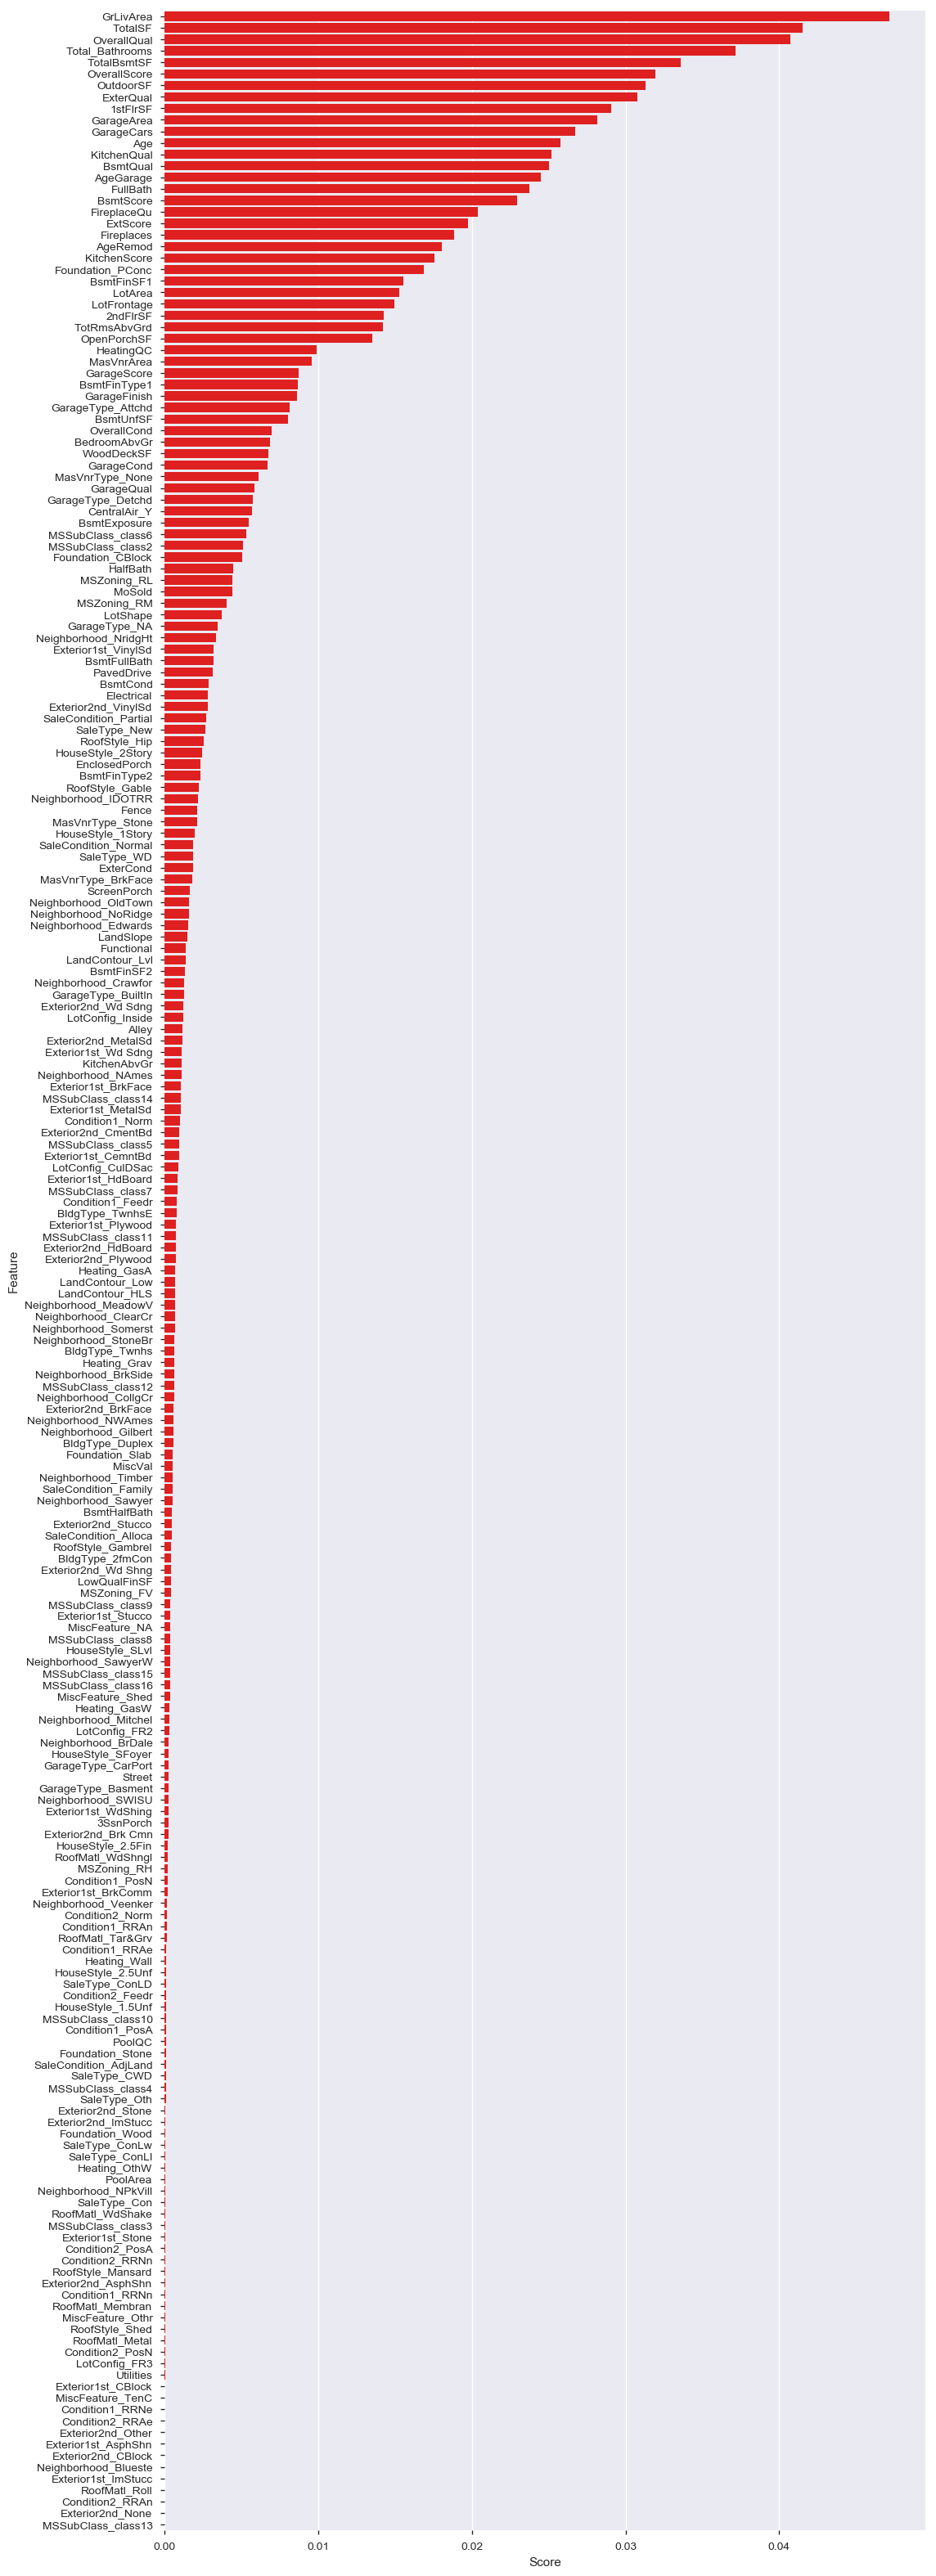

In [46]:
plt.figure(figsize = (12,40))

sns.barplot(x = "Score", y = "Feature", data = features_RFG.sort_values(by = ["Score"], ascending = False), color = "red")

In [47]:
features_best = list(features_RFG.loc[features_RFG["Score"] > 0.01]["Feature"])
features_best

['1stFlrSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtQual',
 'ExterQual',
 'FireplaceQu',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'KitchenQual',
 'LotArea',
 'LotFrontage',
 'OpenPorchSF',
 'OverallQual',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'Age',
 'AgeRemod',
 'AgeGarage',
 'TotalSF',
 'OutdoorSF',
 'OverallScore',
 'ExtScore',
 'BsmtScore',
 'KitchenScore',
 'Total_Bathrooms',
 'Foundation_PConc']

In [48]:
# New training 
X_strict = X_train[features_best]
X_strict.shape, y_train.shape

((1456, 29), (1456,))

In [49]:
# ---> A TRIAL  <---- 

# classifier = xgb.XGBClassifier(
#    objective='binary:logistic', 
#    n_estimators=200, 
#    learning_rate=0.08, 
#    max_depth=5, 
#    nthread=4,
#    subsample=0.9,
#    colsample_bytree=0.8,
#    reg_lambda=6,
#    reg_alpha=5,
#    seed=1301,
#    silent=True
#)


#selector = RFECV(estimator=classifier, step = 3, scoring = rmse_scorer)
#selector

#% time selector.fit(X_train, y_train)
#print('The optimal number of features is {}'.format(selector.n_features_))


### 5-6-7 VALIDATION - MODELLING - PREDICTION

In this step, one or more effective models will be selected from a set of candidate models by validation using the given data. To find out the most appropriate algorithms we have to do much validation to evaluate all candidates. According to the validation results it is able to choose the best-performing ones

##### CV STRATEGY

* <b>My approach is to use the training set to do local validation.</b>

* I will <b> do k-fold cross validation (CV) </b> that can improve the holdout method. In k-fold cross validation the original training dataset is randomly split into k approximately equal-sized subsets. Then the holdout method will be repeated k times, and in each turn one of k subsets is used for validation, and the remaining k-1 subsets are used for training. The final validation result is the average of the k results

In [50]:
print('START ML', datetime.now(), )
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)


# build our model scoring function
# we put minus in front of cross_val_score because we are using a metric
# that is better if the score is lower 
def cv_rmse(model, X=X_train):
    rmse = np.sqrt(-cross_val_score(model, X, y_train,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds)) 
    return (rmse)

START ML 2019-03-25 22:39:16.276065


 * I was pretty curious about discovering methods that have great success on kaggle competion even if implementing
   alone, without looking kernels from masters, was not a success. 
   
   As a consequence i used many kernels as reference and i tried to improve the final score (still not great results) 
   I also studied from differents sources (here the most important) that are illustrated here in order to keep them
   tracked
        
   1) Framework : http://blog.kaggle.com/2016/07/21/approaching-almost-any-machine-learning-problem-abhishek-thakur/
   
   2) Ensembling : https://mlwave.com/kaggle-ensembling-guide/
   
   3) Stacking: https://www.coursera.org/lecture/competitive-data-science/stacking-Qdtt6,   
   
   4) top_practices: https://www.youtube.com/watch?v=W530d2ZdbJE, \\\\
   http://dnc1994.com/2016/05/rank-10-percent-in-first-kaggle-competition-en/

###### LASSO

In [51]:
alphas_lasso = [0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.7, 1]
lasso_cv = [cv_rmse(Lasso(alpha = alpha)).mean() for alpha in alphas_lasso]
print("Lasso best score: {} for alpha: {}".format(np.min(lasso_cv), alphas_lasso[np.argmin(lasso_cv)]))

Lasso best score: 0.11369936647966358 for alpha: 0.0001


Text(0,0.5,'Mean CV rmse')

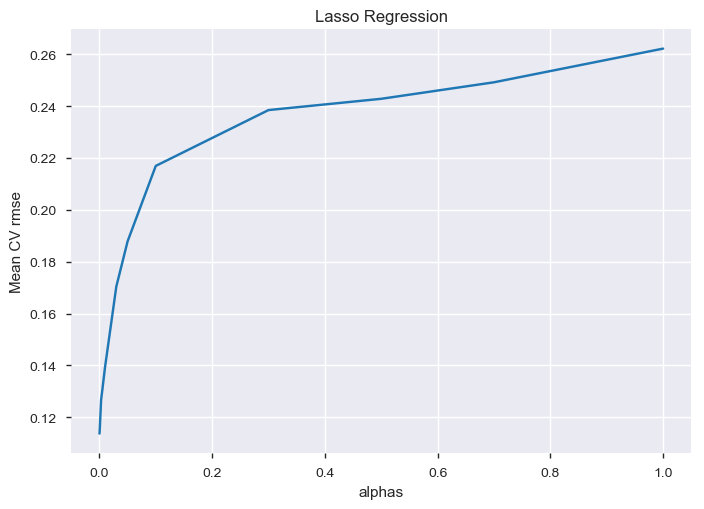

In [52]:
plt.plot(alphas_lasso, lasso_cv)
plt.title("Lasso Regression")
plt.xlabel("alphas")
plt.ylabel("Mean CV rmse")

###### RIDGE 

In [53]:
alphas_ridge = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 25, 30, 50, 60, 75, 85, 100, 200]
ridge_cv = [cv_rmse(Ridge(alpha = alpha)).mean() for alpha in alphas_ridge]
print("Ridge best score: {} for alpha: {}".format(np.min(ridge_cv), alphas_ridge[np.argmin(ridge_cv)]))

Ridge best score: 0.11444926380401924 for alpha: 5


Text(0,0.5,'Mean CV rmse')

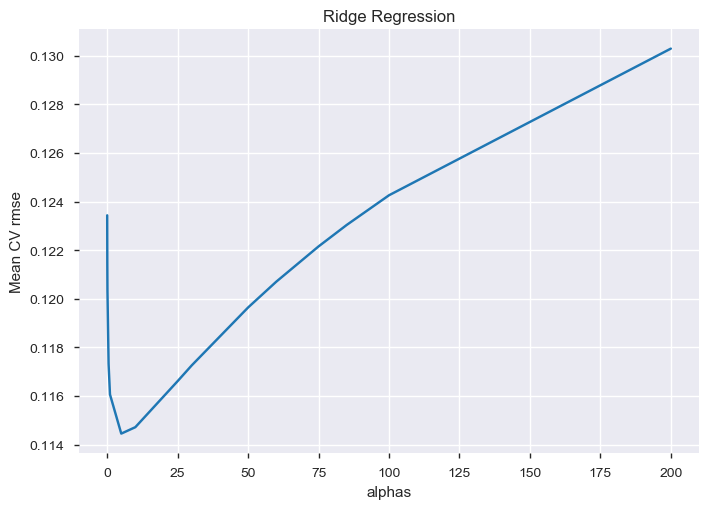

In [54]:
plt.plot(alphas_ridge, ridge_cv)
plt.title("Ridge Regression")
plt.xlabel("alphas")
plt.ylabel("Mean CV rmse")

##### ELASTIC NET

In [55]:
alphas_el = [0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.7, 1]
el_cv = [cv_rmse(ElasticNet(alpha = alpha)).mean() for alpha in alphas_el]
print("ElasticNet best score: {} for alpha: {}".format(np.min(el_cv), alphas_el[np.argmin(el_cv)]))

ElasticNet best score: 0.11321250813488189 for alpha: 0.0003


Text(0,0.5,'Mean CV rmse')

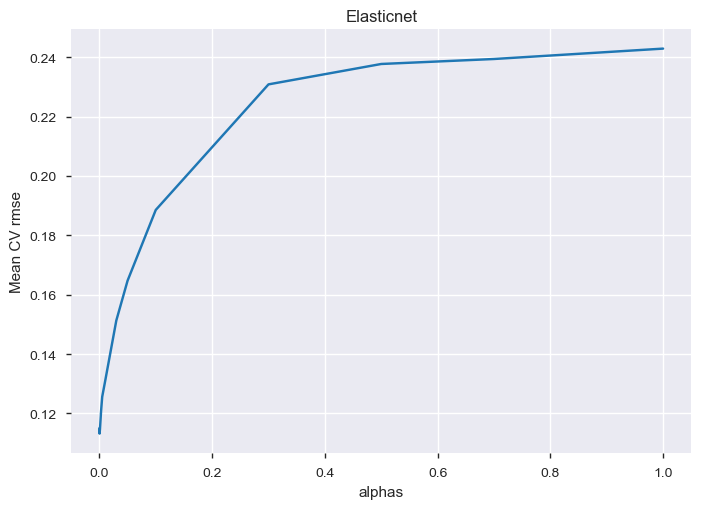

In [56]:
plt.plot(alphas_el, el_cv)
plt.title("Elasticnet")
plt.xlabel("alphas")
plt.ylabel("Mean CV rmse")

###### PIPELINE AS INPUT TO STACK

In [57]:
# MODELS  

# Set parameters: The grid is 
alphas_ridge = [4.5, 4.6, 4.7, 4.8, 4.9, 5, 5.1, 5.2, 5.3, 5.4, 5.5]
alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_elastic = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_ridge, cv=kfolds,))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas=alphas_lasso,
                              random_state=42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1e7, alphas=alphas_elastic,
                                        cv=kfolds, random_state=42, l1_ratio=e_l1ratio))
                                        
svr = make_pipeline(RobustScaler(),
                      SVR(C= 20, epsilon= 0.008, gamma=0.0003,))


gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42)
                                   

xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006, random_state=42)
# STACKING 
# I tried different meta-models: Xgboost is preferred
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, svr, elasticnet,
                                            gbr, xgboost),
                                meta_regressor=xgboost,       
                                use_features_in_secondary=True)
                                

print('TEST score on CV')

TEST score on CV


* Here i calculate the cross validation score (mean of 10 different splits) of each model

In [58]:

score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )



Kernel Ridge score: 0.1144 (0.0119)
 2019-03-25 22:39:31.556100
Lasso score: 0.1147 (0.0117)
 2019-03-25 22:39:42.746407
ElasticNet score: 0.1147 (0.0117)
 2019-03-25 22:40:20.215547
SVR score: 0.1113 (0.0120)
 2019-03-25 22:40:25.537836
GradientBoosting score: 0.1135 (0.0152)
 2019-03-25 22:41:20.743066
Xgboost score: 0.1144 (0.0170)
 2019-03-25 22:46:05.215207


###### Fit

In [59]:
print('START Fit')
print(datetime.now(), 'StackingCVRegressor')
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(y_train))
print(datetime.now(), 'elasticnet')
elastic_model_full_data = elasticnet.fit(X_train, y_train)
print(datetime.now(), 'lasso')
lasso_model_full_data = lasso.fit(X_train, y_train)
print(datetime.now(), 'ridge')
ridge_model_full_data = ridge.fit(X_train, y_train)
print(datetime.now(), 'svr')
svr_model_full_data = svr.fit(X_train, y_train)
print(datetime.now(), 'GradientBoosting')
gbr_model_full_data = gbr.fit(X_train, y_train)
print(datetime.now(), 'xgboost')
xgb_model_full_data = xgboost.fit(X_train, y_train)

START Fit
2019-03-25 22:46:05.221609 StackingCVRegressor
2019-03-25 22:50:22.573571 elasticnet
2019-03-25 22:50:26.417882 lasso
2019-03-25 22:50:27.725628 ridge
2019-03-25 22:50:28.309110 svr
2019-03-25 22:50:28.917544 GradientBoosting
2019-03-25 22:50:34.823287 xgboost


##### Blending

* This actually it has been implemented in a naive way (look the best models and give it more weight),trying different combination in the public submission.

* the proper way should be to split X_train in:
  
  $Xminitrain$, $Yminitrain$, $Xval$, $Yval$
 
  and check which combination of models which in the lowest crossvalidation error.

In [63]:
def blend_models_predict(X):
    return ((0.05 * elastic_model_full_data.predict(X)) + \
            (0.1 * lasso_model_full_data.predict(X)) + \
            (0.05 * ridge_model_full_data.predict(X)) + \
            (0.35 * svr_model_full_data.predict(X)) + \
            (0.15 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.15 * stack_gen_model.predict(np.array(X))))

In [64]:
preds = blend_models_predict(X_test)
preds_sub = np.floor(np.expm1(preds))
preds_sub

array([122905., 163636., 183395., ..., 166222., 116684., 216465.])

In [65]:
solution = pd.DataFrame({"id":test_ID, "SalePrice":preds_sub})
solution.to_csv("finalfinal2.csv", index = False)

### CONCLUSION

* This is my first competition and i have done many mistakes during the whole process. 

* The positive thing is that i have learned a lot: more specifically i will list below
  the steps and things that i should need to take in account for my next competitions:
  
    
    - 1) Start simple, with a simple model taken as reference ( check on LB )
    
    - 2) Keep track of each modification on the code: this means always check 
         if the things that you are doing are going to improve or not your predictions.
         It's crucial. This should be done in a "light" model architecture. 
         
    - 3) Parameter tuning and grid search is a necessary step that i did not implemented
         (i have only done it for lasso,ridge, elasticnet)
         but it should be done for n_estimators and max_depth of xgbr and gradientboost
    
    - 4) Ensemble the tuned models
    
    - 5) Stacking of the best models 
 